 #          Bank Personal Loan Modelling

In [1]:
!pip install zipcodes 

     |████████████████████████████████| 719 kB 5.2 MB/s 


In [2]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import seaborn as sns
import zipcodes as zcode
import scipy.stats as stats
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [5]:
#Reading Data
BankData=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
BankData

ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]

In [22]:
BankData.head()

ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

In [23]:
BankData.tail()

ID  Age  Experience  ...  CD Account  Online  CreditCard
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5 rows x 14 columns]

In [24]:
BankData.sample(10)

ID  Age  Experience  ...  CD Account  Online  CreditCard
1492  1493   33           8  ...           0       1           0
1381  1382   38          12  ...           0       1           0
179    180   62          37  ...           0       1           0
4649  4650   59          35  ...           0       1           0
2165  2166   27           0  ...           0       1           0
569    570   40          14  ...           0       0           0
4717  4718   29           5  ...           0       1           0
3662  3663   35           9  ...           0       0           0
2194  2195   34           9  ...           0       1           0
1162  1163   38          14  ...           0       0           0

[10 rows x 14 columns]

In [6]:
BankData.shape

(5000, 14)

In [26]:
BankData.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# converting categorical varaible to category type
category_col = ['Personal Loan', 'Securities Account','Family', 'CD Account', 'Online','ZIP Code','CreditCard', 'Education']
BankData[category_col] = BankData[category_col].astype('category')

In [9]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   category
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 302.9 KB


In [10]:
#Missing Values Checking
BankData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
BankData = BankData.drop_duplicates()

In [12]:
#Drop ID
BankData.drop('ID',axis=1,inplace=True)

In [12]:
#Describe data
BankData.describe().transpose()

count       mean         std   min   25%   50%    75%    max
Age         5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   67.0
Experience  5000.0  20.104600   11.467954  -3.0  10.0  20.0   30.0   43.0
Income      5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0  224.0
CCAvg       5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   10.0
Mortgage    5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0  635.0

In [13]:
BankData.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [14]:
#Experience Column has negative values
#Exploring Experince colmun
BankData['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [ ]:
# The minimum value in experience is -3 which cannot be less than 0.

In [15]:
#printing the rows with negative Experience values
BankData[BankData['Experience']< 0].sort_values(by='Experience',ascending=True)

Age  Experience  Income  ... CD Account Online  CreditCard
4514   24          -3      41  ...          0      1           0
2618   23          -3      55  ...          0      1           0
4285   23          -3     149  ...          0      1           0
3626   24          -3      28  ...          0      0           0
2717   23          -2      45  ...          0      1           1
2876   24          -2      80  ...          0      0           0
3130   23          -2      82  ...          0      0           1
2466   24          -2      80  ...          0      1           0
3796   24          -2      50  ...          0      0           0
2962   23          -2      81  ...          0      0           0
793    24          -2     150  ...          0      1           0
3887   24          -2     118  ...          0      1           0
889    24          -2      82  ...          0      1           1
597    24          -2     125  ...          0      0           1
315    24          -2      51  ...          0      1           0
451    28          -2      48  ...          0      1           0
4116   24          -2     135  ...          0      1           0
4481   25          -2      35  ...          0      1           0
4411   23          -2      75  ...          0      1           1
4015   25          -1     139  ...          0      0           1
3157   23          -1      13  ...          0      1           0
3279   26          -1      44  ...          0      0           0
3284   25          -1     101  ...          0      0           1
3292   25          -1      13  ...          0      0           0
3394   25          -1     113  ...          0      1           0
3425   23          -1      12  ...          0      1           0
4088   29          -1      71  ...          0      0           0
3824   23          -1      12  ...          0      0           1
3946   25          -1      40  ...          0      1           0
3076   29          -1      62  ...          0      0           1
89     25          -1     113  ...          0      0           1
2848   24          -1      78  ...          0      0           0
226    24          -1      39  ...          0      0           0
524    24          -1      75  ...          0      1           0
536    25          -1      43  ...          0      1           0
540    25          -1     109  ...          0      1           0
576    25          -1      48  ...          0      0           1
583    24          -1      38  ...          0      1           0
649    25          -1      82  ...          0      1           0
670    23          -1      61  ...          0      1           0
2980   25          -1      53  ...          0      0           0
686    24          -1      38  ...          0      1           0
1173   24          -1      35  ...          0      0           0
1428   25          -1      21  ...          0      1           0
1522   25          -1     101  ...          0      0           1
1905   25          -1     112  ...          0      1           0
2102   25          -1      81  ...          0      1           1
2430   23          -1      73  ...          0      1           0
2545   25          -1      39  ...          0      1           0
4582   25          -1      69  ...          0      1           0
909    23          -1     149  ...          0      0           1
4957   29          -1      50  ...          0      0           1

[52 rows x 13 columns]

In [16]:
np.sum([BankData['Experience'] < 0])

52

In [17]:
BankData[BankData['Experience'] < 0].describe().T

count       mean        std   min    25%   50%     75%    max
Age          52.0  24.519231   1.475159  23.0  24.00  24.0  25.000   29.0
Experience   52.0  -1.442308   0.639039  -3.0  -2.00  -1.0  -1.000   -1.0
Income       52.0  69.942308  37.955295  12.0  40.75  65.5  86.750  150.0
CCAvg        52.0   2.129423   1.750562   0.2   1.00   1.8   2.325    7.2
Mortgage     52.0  43.596154  90.027068   0.0   0.00   0.0   0.000  314.0

In [ ]:
#We can see that Age group of the customers with negative years of experience is between 23 and 29 years.
#The dataset also contains 52 customers with negative years of experience.
#As the dataset has 5000 values and only 52 have negative years of experience, we can drop these records from our dataset for analysis(1 percent of records) or replace them with mean/median of Experience.

In [18]:
#Correction Noisy Data
BankData.loc[BankData['Experience']<0,'Experience']=np.abs(BankData['Experience'])

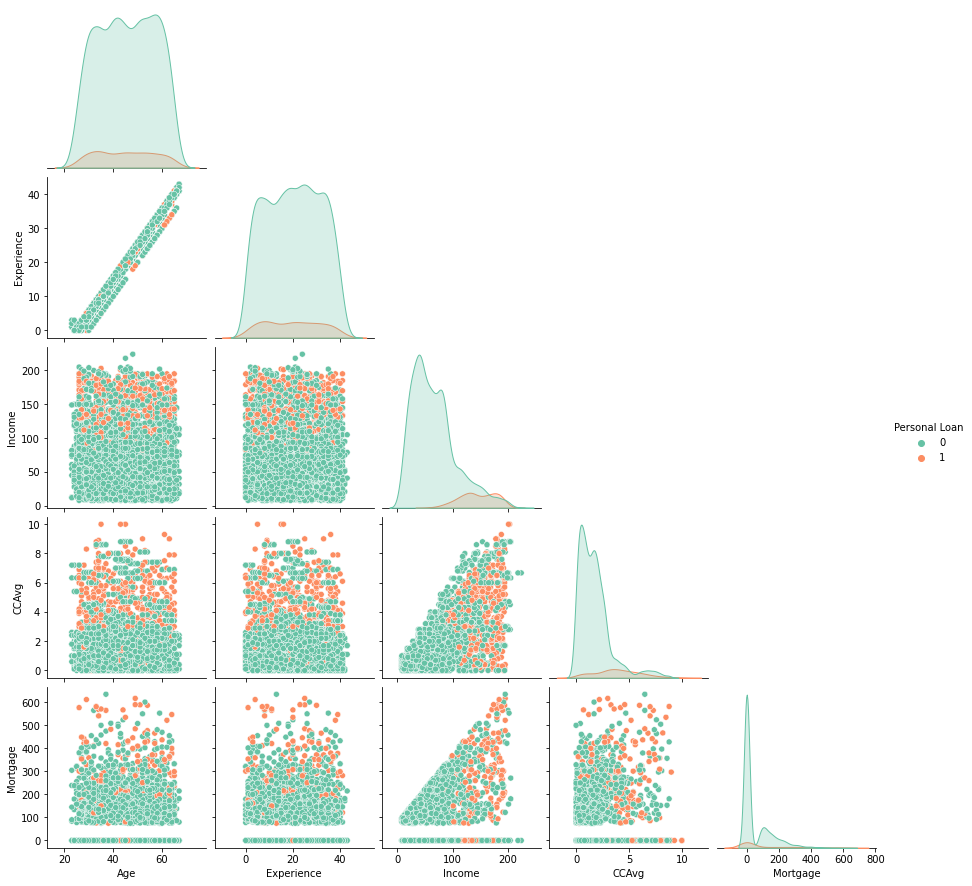

In [20]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(BankData, hue="Personal Loan",corner=True)
plt.show()

In [21]:
def draw_axvlines(plt, col):
    mean = col.mean()
    q1 = col.quantile(.25)
    q2 = col.quantile(.5)
    q3 = col.quantile(.75)
    plt.axvline(mean, color = "g")              # Plotting a line to mark the mean 
    plt.axvline(q1, color = "b")                # Plotting a line to mark Q1 
    plt.axvline(q2, color = "navy")             # Plotting a line to mark Q2 
    plt.axvline(q3, color = "purple")           # Plotting a line to mark Q3
    plt.legend({"Mean": mean, "25%" : q1, "50%" : q2, "75%" : q3})

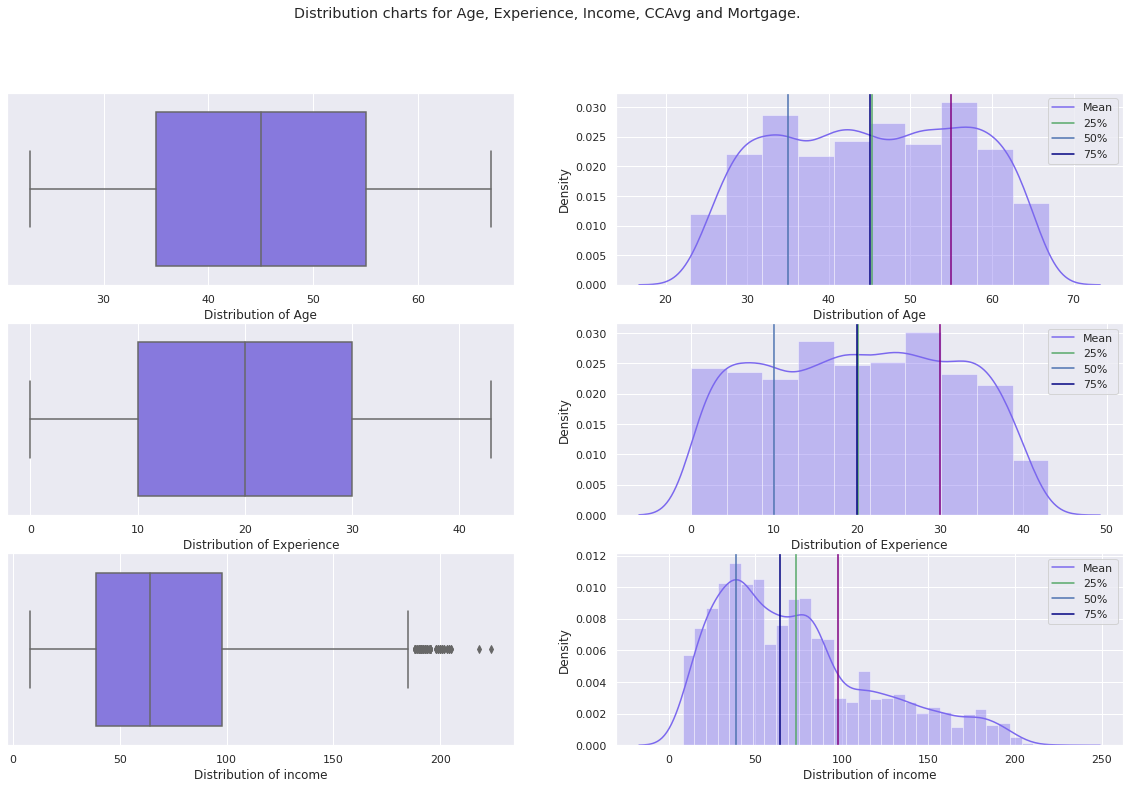

In [22]:
sns.set_theme()
fig, axes = plt.subplots(3, 2, figsize = (20,12))
fig.suptitle('Distribution charts for Age, Experience, Income, CCAvg and Mortgage.')


# Create boxplot and histogram to show distribution of Age
sns.boxplot(BankData["Age"], ax = axes[0][0], color = "mediumslateblue")
axes[0][0].set(xlabel = 'Distribution of Age')

pp = sns.distplot(BankData["Age"], ax = axes[0][1], bins = 10, color = "mediumslateblue")
axes[0][1].set(xlabel = 'Distribution of Age')
draw_axvlines(pp, BankData["Age"])

# Create boxplot and histogram to show distribution of Experience
sns.boxplot(BankData["Experience"], ax = axes[1][0], color = "mediumslateblue")
axes[1][0].set(xlabel = 'Distribution of Experience')

pp = sns.distplot(BankData["Experience"], ax = axes[1][1], bins = 10, color = "mediumslateblue")
axes[1][1].set(xlabel = 'Distribution of Experience')
draw_axvlines(pp, BankData["Experience"])


# Create boxplot and histogram to show distribution of Income
sns.boxplot(BankData["Income"], ax = axes[2][0], color = "mediumslateblue")
axes[2][0].set(xlabel = 'Distribution of income')

pp = sns.distplot(BankData["Income"], ax = axes[2][1], color = "mediumslateblue")
axes[2][1].set(xlabel = 'Distribution of income')
draw_axvlines(pp, BankData["Income"])


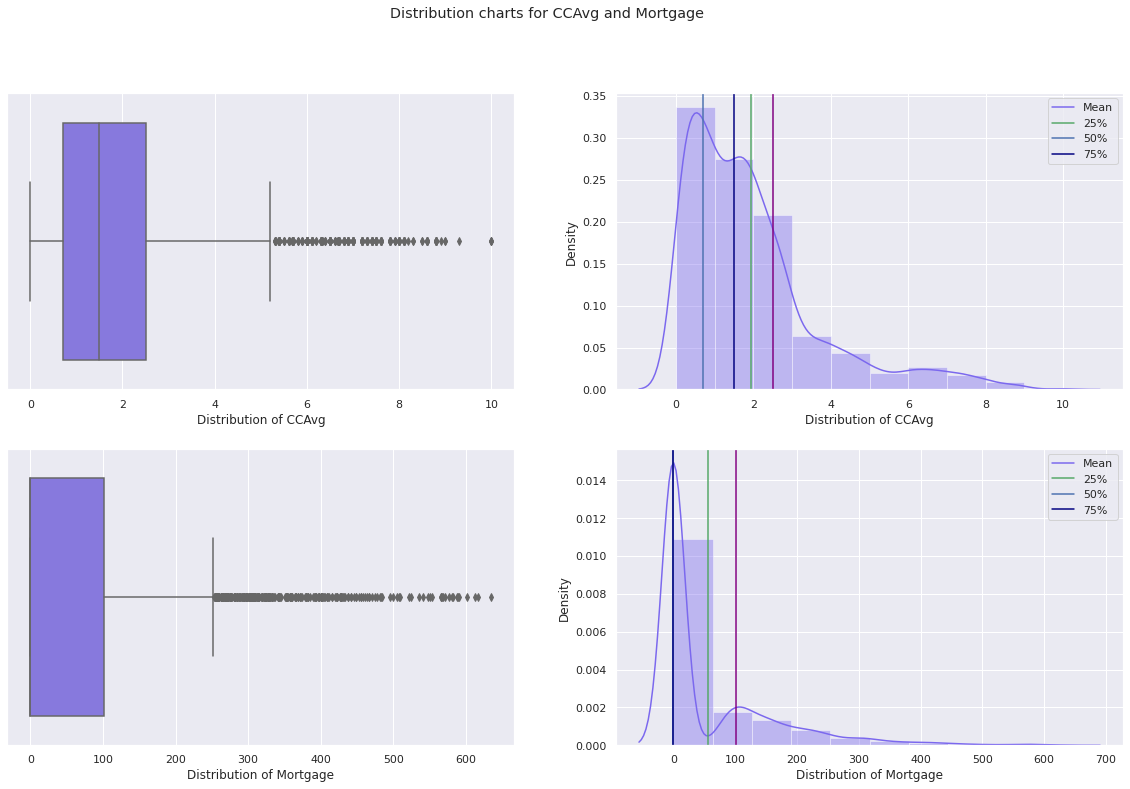

In [23]:
sns.set_theme()
fig, axes = plt.subplots(2, 2, figsize = (20,12))
fig.suptitle('Distribution charts for CCAvg and Mortgage')


# Create boxplot and histogram to show distribution of CCAvg
sns.boxplot(BankData["CCAvg"], ax = axes[0][0], color = "mediumslateblue")
axes[0][0].set(xlabel = 'Distribution of CCAvg')

pp = sns.distplot(BankData["CCAvg"], ax = axes[0][1], bins = 10, color = "mediumslateblue")
axes[0][1].set(xlabel = 'Distribution of CCAvg')
draw_axvlines(pp, BankData["CCAvg"])

# Create boxplot and histogram to show distribution of Mortgage
sns.boxplot(BankData["Mortgage"], ax = axes[1][0], color = "mediumslateblue")
axes[1][0].set(xlabel = 'Distribution of Mortgage')

pp = sns.distplot(BankData["Mortgage"], ax = axes[1][1], bins = 10, color = "mediumslateblue")
axes[1][1].set(xlabel = 'Distribution of Mortgage')
draw_axvlines(pp, BankData["Mortgage"])

In [44]:
BankData.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [27]:
# Categorical Variables : Education, Personal Loan, Securities Account, CD Account, Online, Credit card
catCols = list(['Education','Securities Account','CD Account','Online','CreditCard','Personal Loan','ZIP Code'])
for index in catCols:
    print(BankData[index].value_counts(),"\n")

1    2096
3    1501
2    1403
Name: Education, dtype: int64 

0    4478
1     522
Name: Securities Account, dtype: int64 

0    4698
1     302
Name: CD Account, dtype: int64 

1    2984
0    2016
Name: Online, dtype: int64 

0    3530
1    1470
Name: CreditCard, dtype: int64 

0    4520
1     480
Name: Personal Loan, dtype: int64 

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
92694      1
94965      1
94970      1
91024      1
9307       1
Name: ZIP Code, Length: 467, dtype: int64 



In [28]:
BankData["Education"].replace({1:'Undergrad',2:'Graudate',3:'Professioanl'},inplace=True)
BankData['Education'].sample(10)

1962       Undergrad
1633        Graudate
934     Professioanl
4909        Graudate
2716        Graudate
4242        Graudate
2957        Graudate
2745        Graudate
2216       Undergrad
4226       Undergrad
Name: Education, dtype: object

In [29]:
BankData.Education.value_counts()

Undergrad       2096
Professioanl    1501
Graudate        1403
Name: Education, dtype: int64

In [30]:
#Exploring Age colmun
#converting ages to bin to explore if there is any pattern
BankData['Agebin'] = pd.cut(BankData['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])
BankData

Age  Experience  Income ZIP Code  ... CD Account  Online CreditCard  Agebin
0      25           1      49    91107  ...          0       0          0   18-30
1      45          19      34    90089  ...          0       0          0   41-50
2      39          15      11    94720  ...          0       0          0   31-40
3      35           9     100    94112  ...          0       0          0   31-40
4      35           8      45    91330  ...          0       0          1   31-40
...   ...         ...     ...      ...  ...        ...     ...        ...     ...
4995   29           3      40    92697  ...          0       1          0   18-30
4996   30           4      15    92037  ...          0       1          0   18-30
4997   63          39      24    93023  ...          0       0          0  60-100
4998   65          40      49    90034  ...          0       1          0  60-100
4999   28           4      83    92612  ...          0       1          1   18-30

[5000 rows x 14 columns]

In [31]:
#Income labeling:Low,Medium,High
BankData["Income_group"] = pd.cut(x=BankData["Income"],bins=[0, 50, 140, 224],labels=["Lower", "Middle", "High"])
BankData

Age  Experience  Income ZIP Code  ... Online  CreditCard  Agebin  Income_group
0      25           1      49    91107  ...      0           0   18-30         Lower
1      45          19      34    90089  ...      0           0   41-50         Lower
2      39          15      11    94720  ...      0           0   31-40         Lower
3      35           9     100    94112  ...      0           0   31-40        Middle
4      35           8      45    91330  ...      0           1   31-40         Lower
...   ...         ...     ...      ...  ...    ...         ...     ...           ...
4995   29           3      40    92697  ...      1           0   18-30         Lower
4996   30           4      15    92037  ...      1           0   18-30         Lower
4997   63          39      24    93023  ...      0           0  60-100         Lower
4998   65          40      49    90034  ...      1           0  60-100         Lower
4999   28           4      83    92612  ...      1           1   18-30        Middle

[5000 rows x 15 columns]

In [32]:
#CCAvge == customer spending:Upper,Middle,Lower
BankData['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [33]:
BankData["Spending_group"] = pd.cut( x=BankData["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],labels=["Low", "Medium", "High"],include_lowest=True)
BankData

Age  Experience  Income  ...  Agebin Income_group  Spending_group
0      25           1      49  ...   18-30        Lower          Medium
1      45          19      34  ...   41-50        Lower          Medium
2      39          15      11  ...   31-40        Lower          Medium
3      35           9     100  ...   31-40       Middle            High
4      35           8      45  ...   31-40        Lower          Medium
...   ...         ...     ...  ...     ...          ...             ...
4995   29           3      40  ...   18-30        Lower          Medium
4996   30           4      15  ...   18-30        Lower             Low
4997   63          39      24  ...  60-100        Lower             Low
4998   65          40      49  ...  60-100        Lower             Low
4999   28           4      83  ...   18-30       Middle          Medium

[5000 rows x 16 columns]

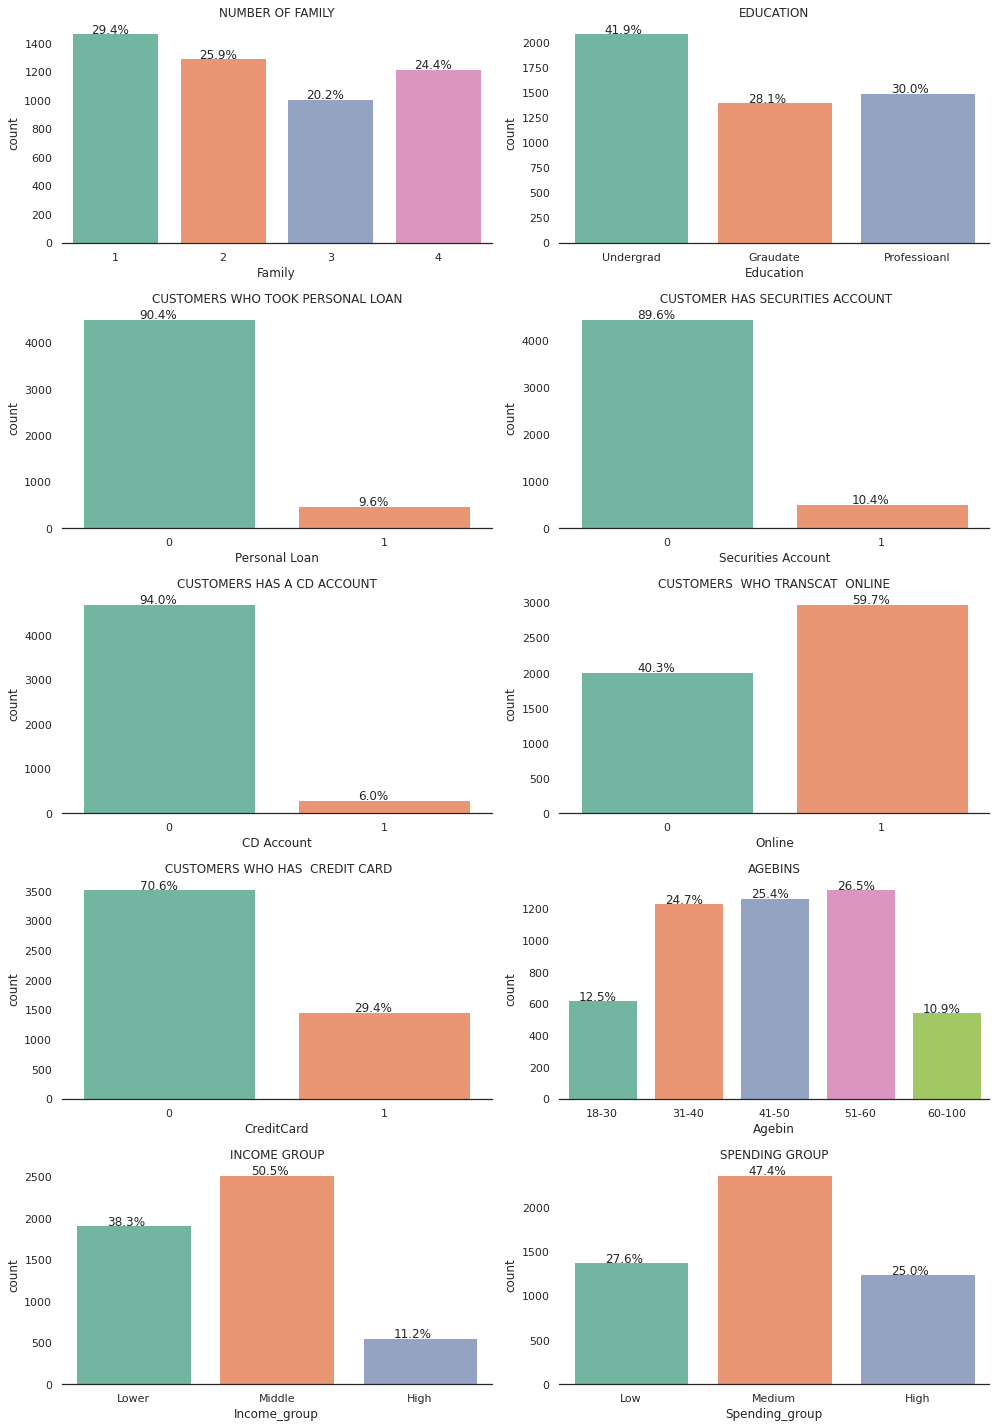

In [34]:
#Barchart of Categorical variables side by side
# Making a list of all categorical variables
cat_columns = ['Family','Education','Personal Loan','Securities Account',
               'CD Account','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white")

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = BankData[variable].value_counts(ascending=False).index   
                     
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=BankData[variable], data=BankData )
                     sns.despine(top=True,right=True,left=True) 
                     
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(BankData[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())


<Figure size 1008x1440 with 0 Axes>

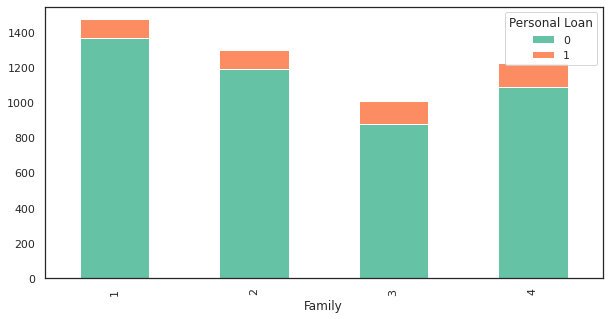

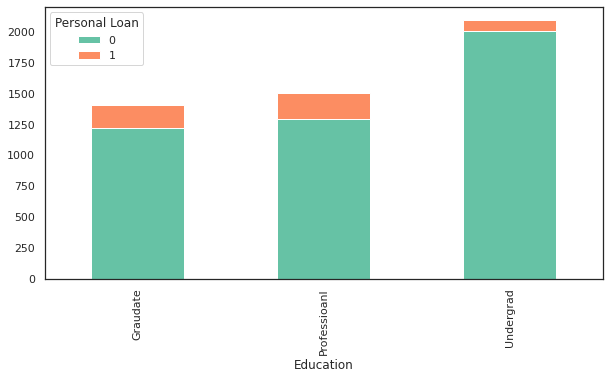

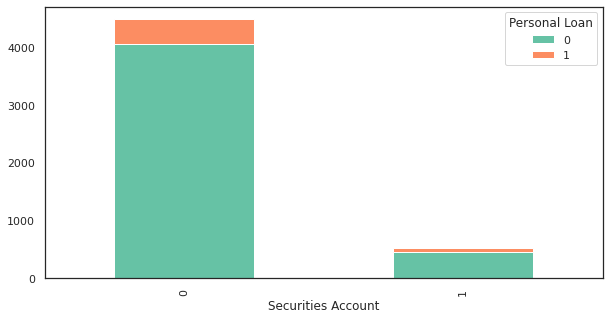

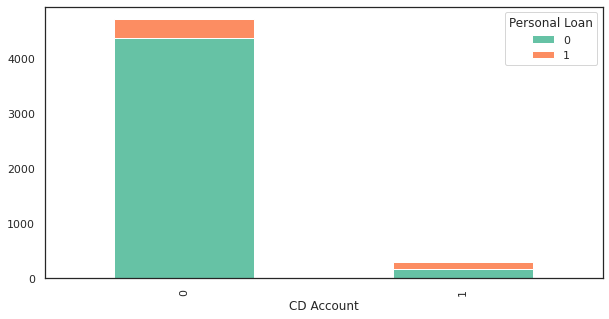

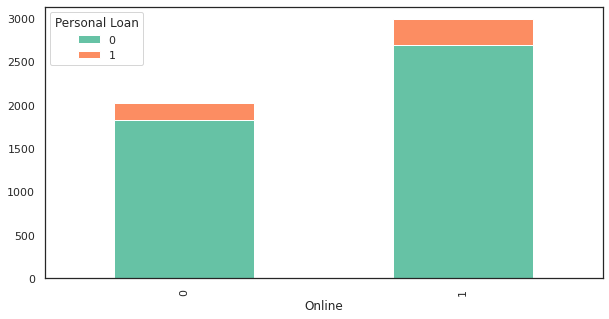

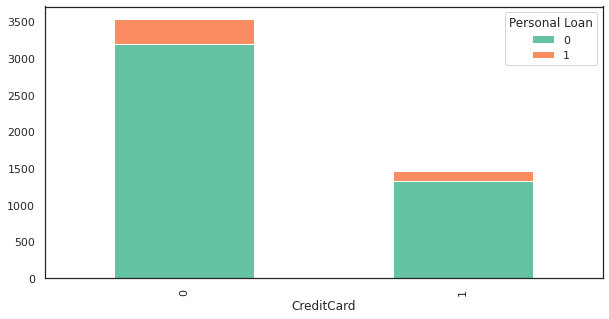

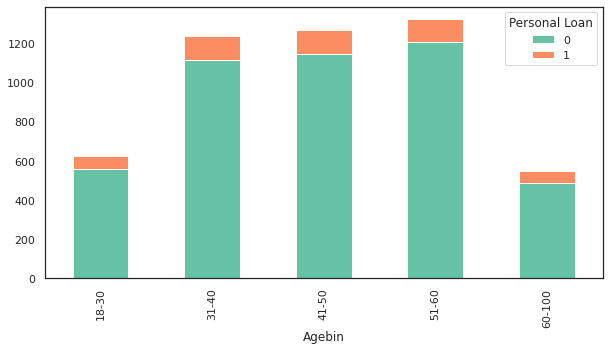

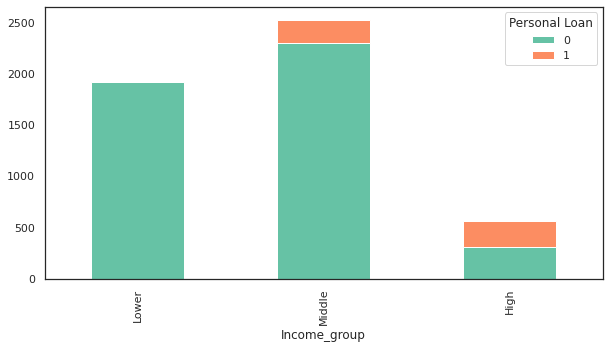

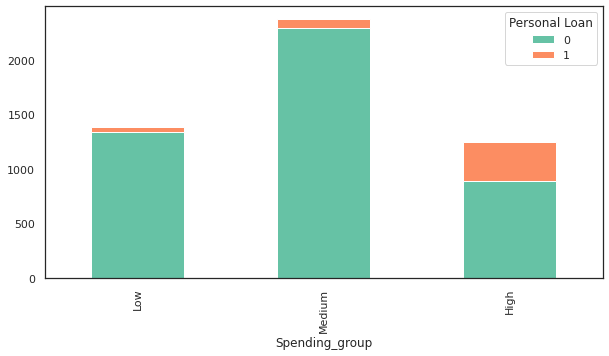

In [35]:
cat_columns2 = ['Family','Education','Securities Account','CD Account','Online',
               'CreditCard','Agebin','Income_group','Spending_group']
plt.figure(figsize=(14,20))              
for i, variable in enumerate(cat_columns2): 
                    #order = BankData[variable].value_counts(ascending=False).index   
                    #sns.countplot(x= BankData[variable],hue='Personal Loan',data=BankData)
                    #sns.despine(top=True,right=True,left=True) 
                    pd.crosstab(BankData[variable],BankData['Personal Loan']).plot.bar(figsize=(10,5),stacked=True)
                    

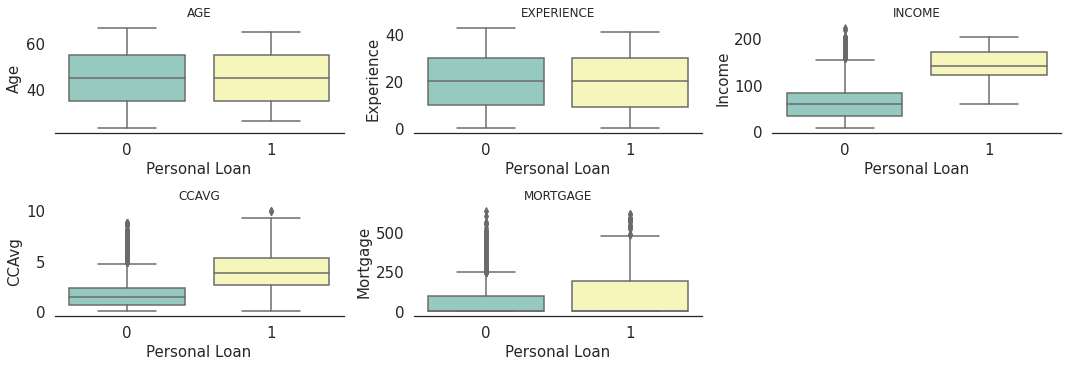

In [36]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set3", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        ax=sns.boxplot(x='Personal Loan',y= BankData[variable], data=BankData)
        #axes.set_title(variable,fontsize=50)
        ax.set_xlabel('Personal Loan',fontsize=15)
        ax.set_ylabel(variable,fontsize=15)
        ax.tick_params(labelsize=15)       
        sns.despine(top=True,right=True,left=True) 
        plt.tight_layout()
        plt.title(variable.upper())

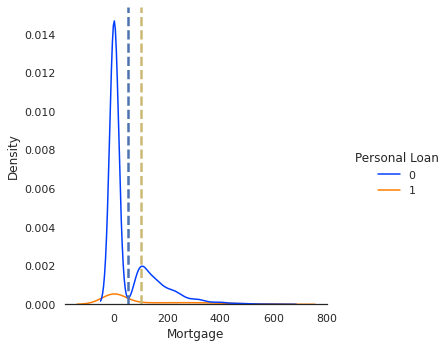

In [37]:
sns.set_palette("bright")
sns.displot(data=BankData, x="Mortgage", hue="Personal Loan", kind="kde")
sns.despine(top=True,right=True,left=True)
plt.axvline(x=BankData[BankData['Personal Loan'] == 0]['Mortgage'].mean(), ls='--', 
            lw=2.5,color='b')
plt.axvline(x=BankData[BankData['Personal Loan'] == 1]['Mortgage'].mean(), ls='--', 
            lw=2.5,color='y')

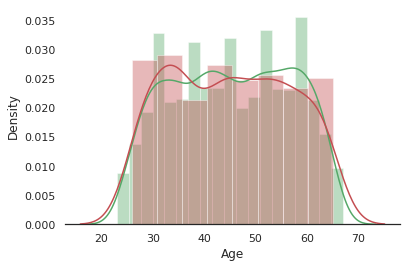

In [38]:
sns.distplot( BankData[BankData['Personal Loan'] == 0]['Age'], color = 'g')
sns.distplot( BankData[BankData['Personal Loan'] == 1]['Age'], color = 'r')
sns.despine(top=True,right=True,left=True)

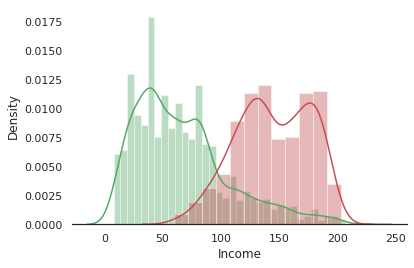

In [39]:
sns.distplot( BankData[BankData['Personal Loan'] == 0]['Income'], color = 'g')
sns.distplot( BankData[BankData['Personal Loan'] == 1]['Income'], color = 'r')
sns.despine(top=True,right=True,left=True)

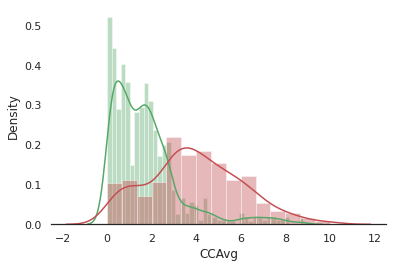

In [61]:
sns.distplot( BankData[BankData['Personal Loan'] == 0]['CCAvg'], color = 'g')
sns.distplot( BankData[BankData['Personal Loan'] == 1]['CCAvg'], color = 'r')
sns.despine(top=True,right=True,left=True)

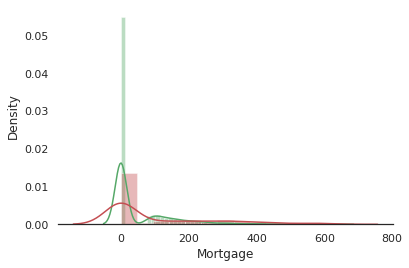

In [62]:
sns.distplot( BankData[BankData['Personal Loan'] == 0]['Mortgage'], color = 'g')
sns.distplot( BankData[BankData['Personal Loan'] == 1]['Mortgage'], color = 'r')
sns.despine(top=True,right=True,left=True)

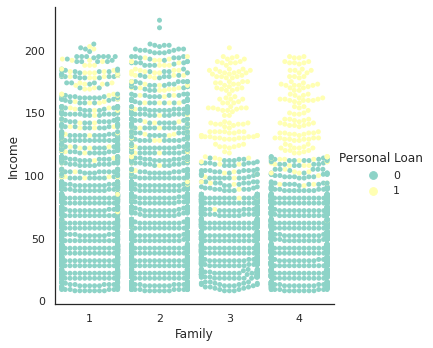

In [63]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = BankData, kind='swarm')
plt.show()

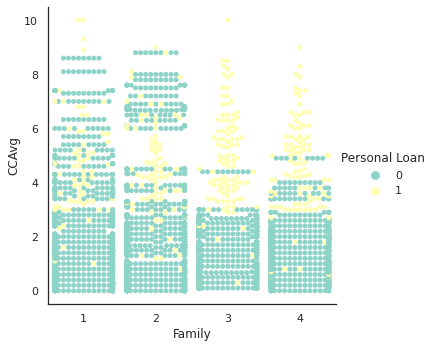

In [64]:
sns.catplot(x='Family', y='CCAvg', hue='Personal Loan', data = BankData, kind='swarm')
plt.show()

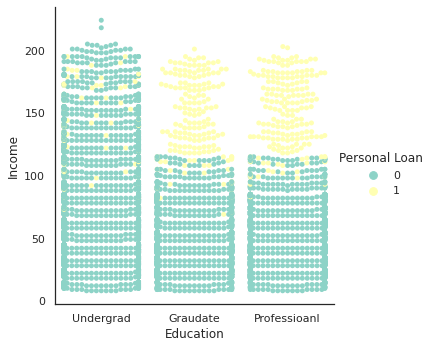

In [65]:
sns.catplot(x='Education', y='Income', hue='Personal Loan', data = BankData, kind='swarm')
plt.show()

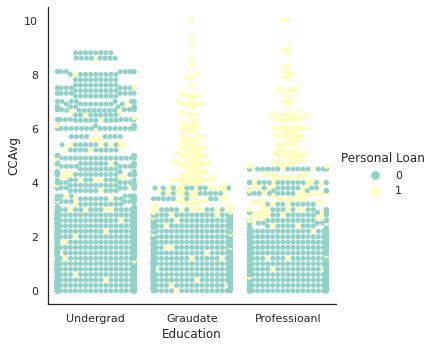

In [66]:
sns.catplot(x='Education', y='CCAvg', hue='Personal Loan', data = BankData, kind='swarm')
plt.show()

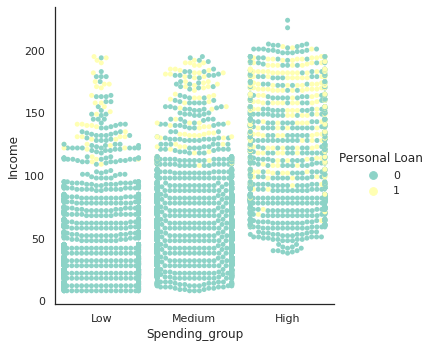

In [68]:
sns.catplot(x='Spending_group', y='Income', hue='Personal Loan', data = BankData, kind='swarm')
plt.show()

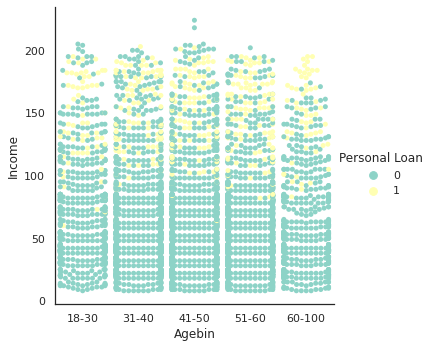

In [69]:
sns.catplot(x='Agebin', y='Income', hue='Personal Loan', data = BankData, kind='swarm')
plt.show()

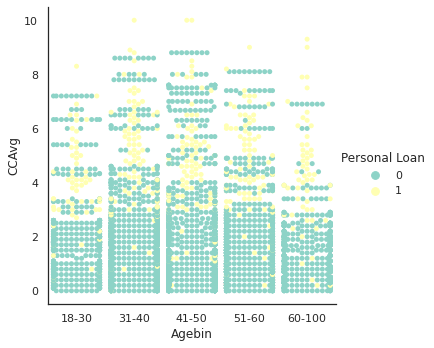

In [70]:
sns.catplot(x='Agebin', y='CCAvg', hue='Personal Loan', data = BankData, kind='swarm')
plt.show()

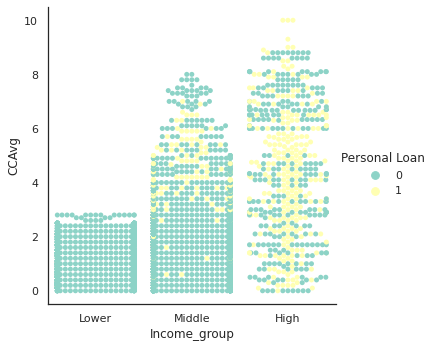

In [71]:
sns.catplot(x='Income_group', y='CCAvg', hue='Personal Loan', data = BankData, kind='swarm')
plt.show()

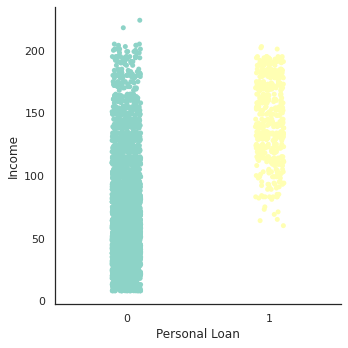

In [72]:
sns.catplot(x="Personal Loan", y="Income", data=BankData)
plt.show()

In [40]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    sns.set_palette('cubehelix')
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = BankData.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title=x.capitalize(),
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12)

    ax[0].set_title(f'{x.capitalize()} Pie Chart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    df = pd.pivot_table(BankData, index = [x], columns = ['Personal Loan'], values = ['Income'], aggfunc = len)

    labels = df.index.tolist()
    loan_no = df.values[:, 0].tolist()
    loan_yes = df.values[:, 1].tolist()
    
    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, loan_no, width, label='0', color = color1)
    rects2 = ax[1].bar(l + width/2, loan_yes, width, label='1', color = color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    
    def autolabel(rects):
        
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'medium',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()
    
    """
    Draw a Stacked Bar Graph on bottom.
    """
    
    sns.set(palette="tab10")
    tab = pd.crosstab(BankData[x], BankData['Personal Loan'].map({0:'No Loan', 1:'Loan'}), normalize="index")
    
    tab.plot.bar(stacked=True, figsize=(16, 3))
    plt.title(x.capitalize() + ' Stacked Bar Plot')
    plt.legend(loc="upper right", bbox_to_anchor=(0,1))
    plt.show()

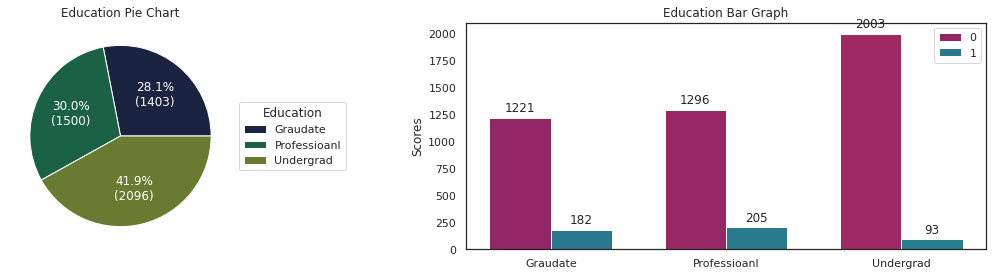

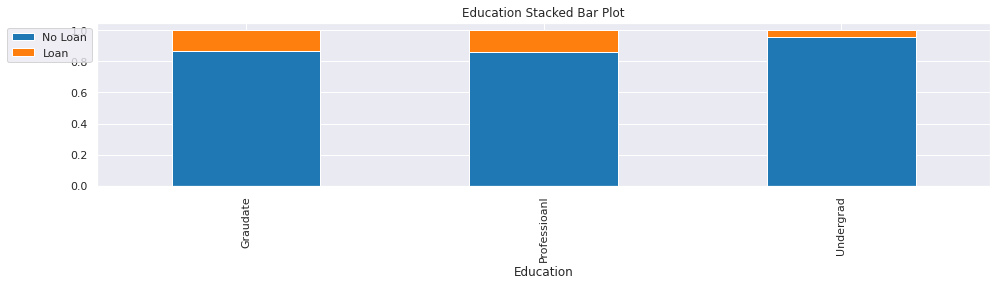

In [41]:
cat_view('Education')

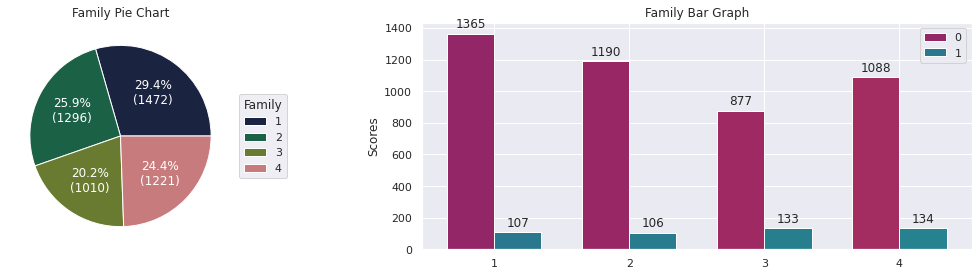

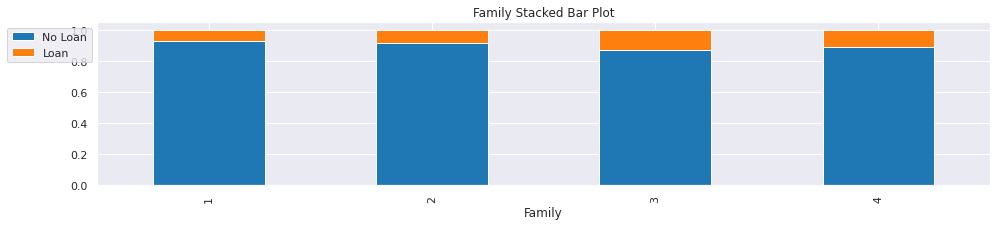

In [41]:
cat_view('Family')

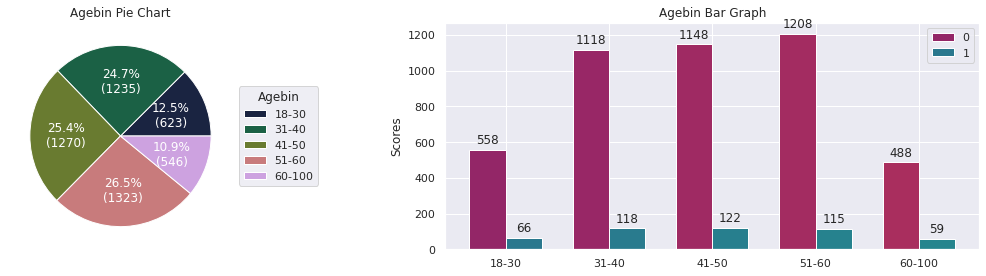

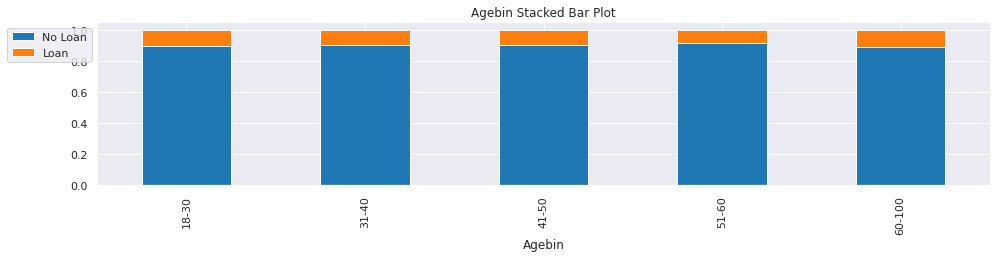

In [42]:
cat_view('Agebin')

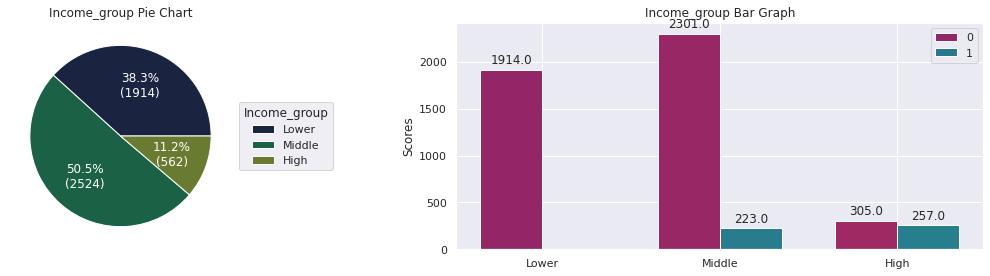

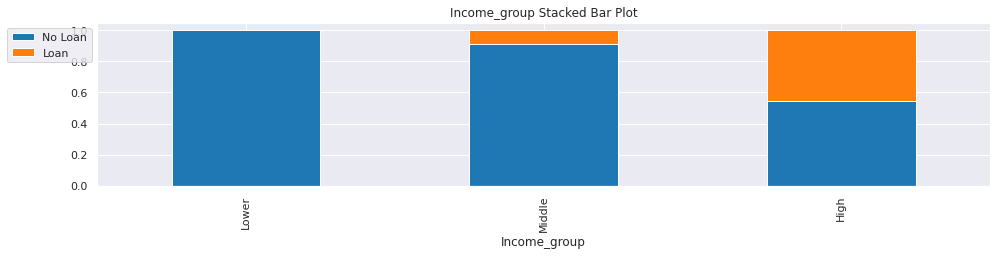

In [77]:
cat_view('Income_group')

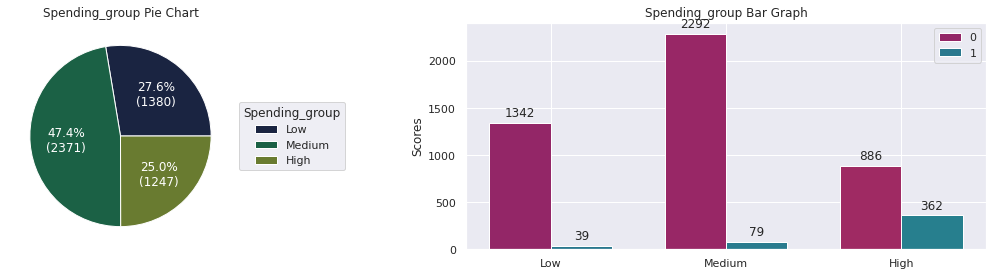

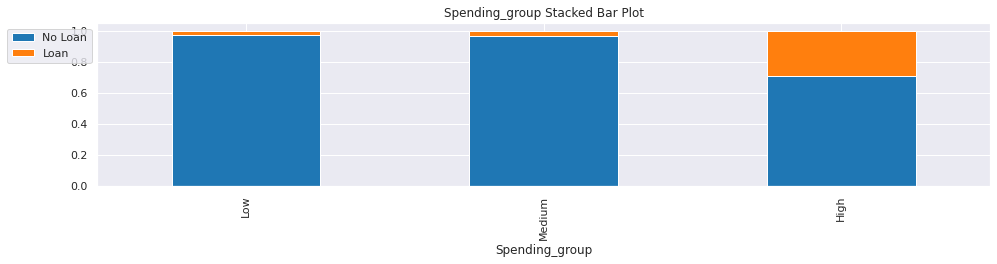

In [78]:
cat_view("Spending_group")

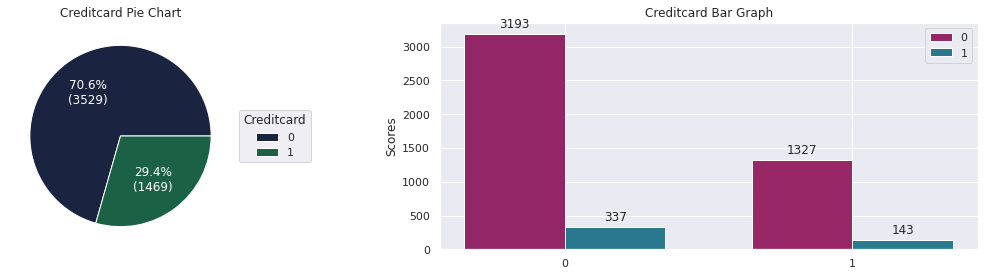

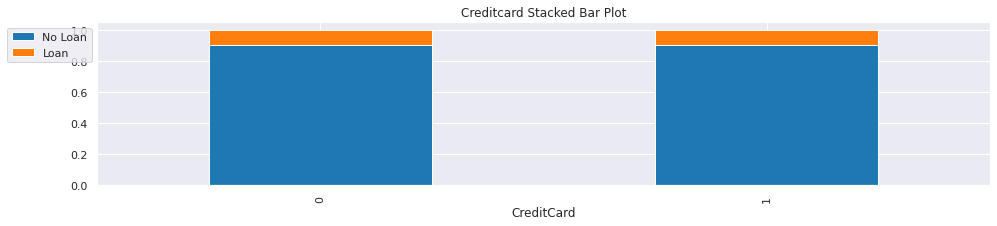

In [79]:
cat_view('CreditCard')

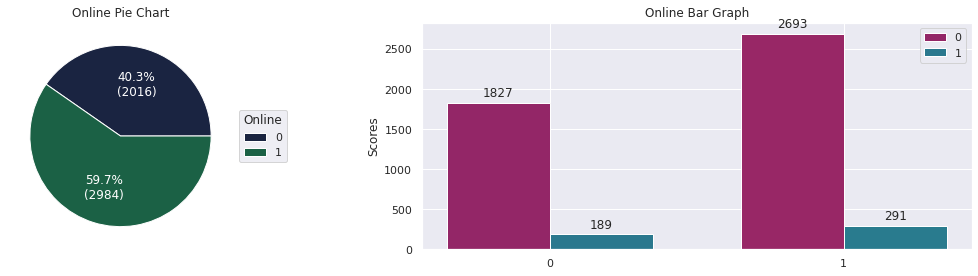

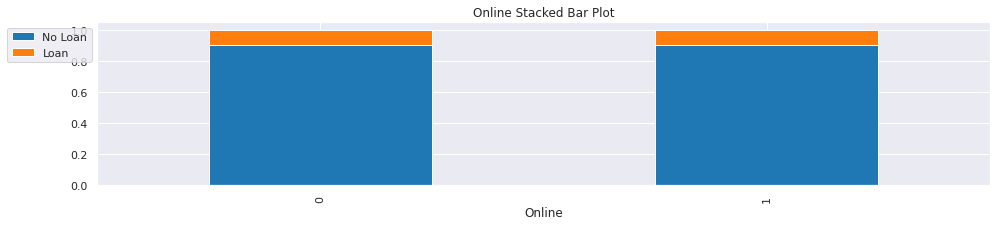

In [80]:
cat_view('Online')

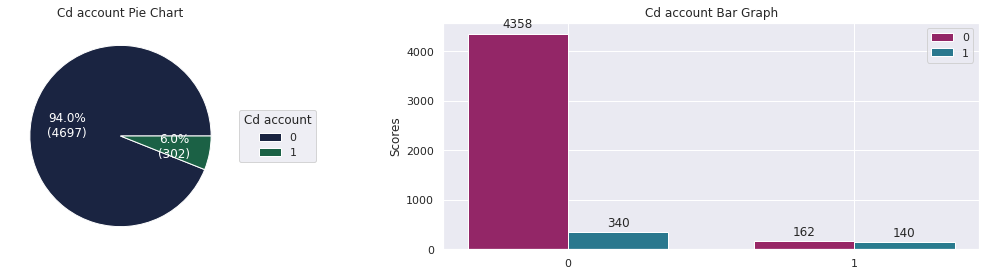

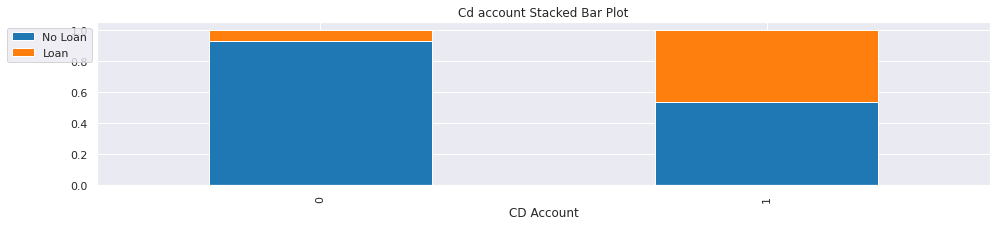

In [81]:
cat_view('CD Account')

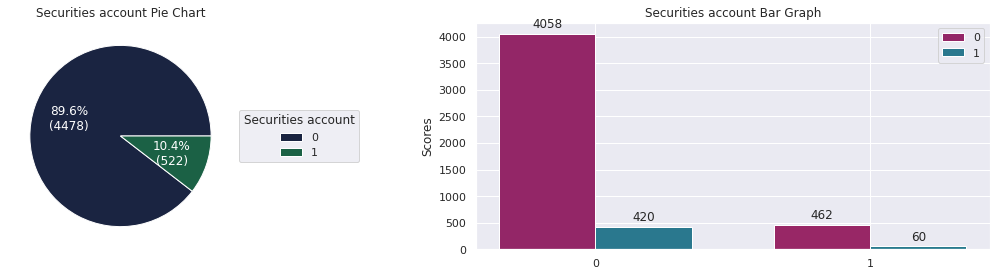

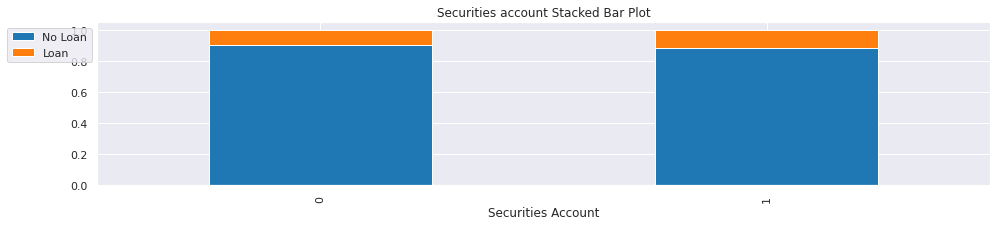

In [82]:
cat_view('Securities Account')

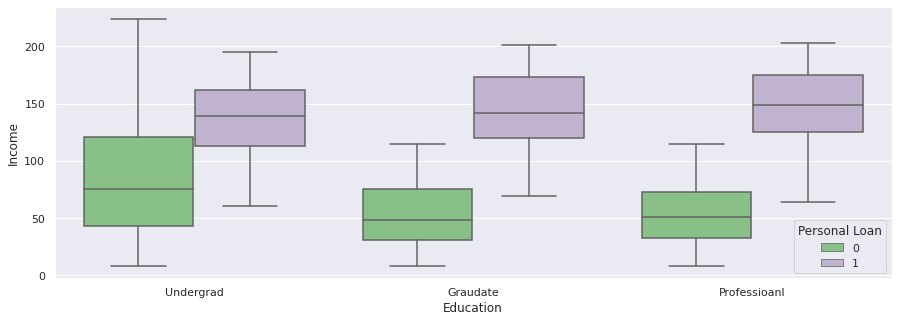

In [83]:
sns.set(palette='Accent')
plt.figure(figsize=(15,5))
sns.boxplot(data=BankData,y='Income',x='Education',hue='Personal Loan')
plt.show()

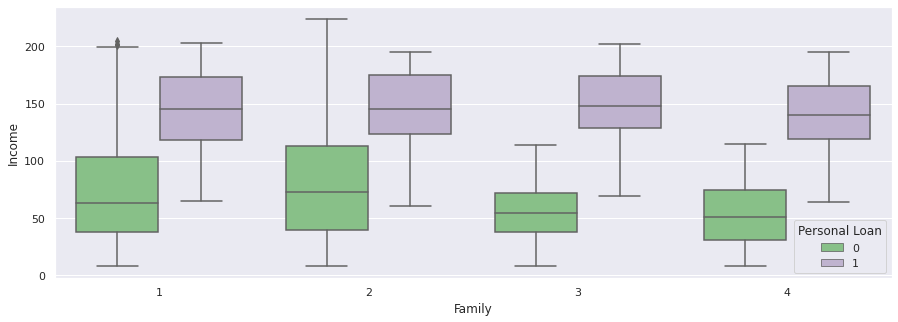

In [84]:
plt.figure(figsize=(15,5))
sns.boxplot(data=BankData,y='Income',x='Family',hue='Personal Loan')
plt.show()

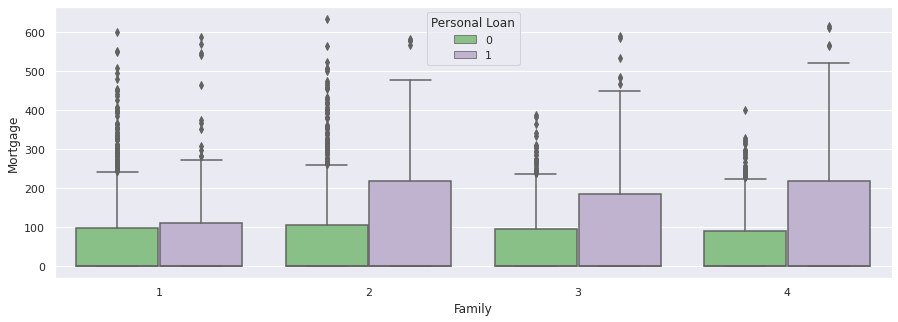

In [85]:
plt.figure(figsize=(15,5))
sns.boxplot(data=BankData,y='Mortgage',x='Family',hue='Personal Loan')
plt.show()

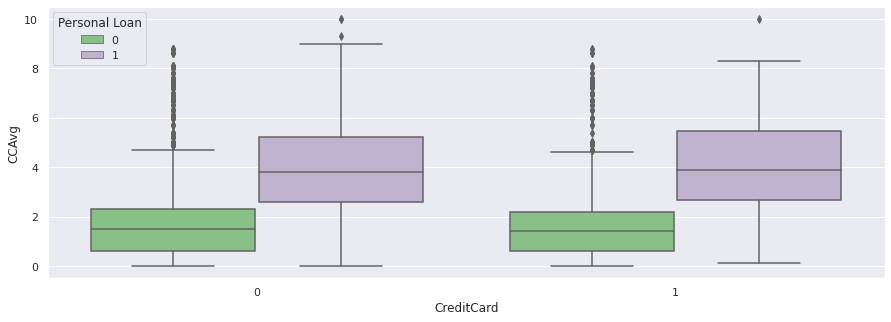

In [86]:
plt.figure(figsize=(15,5))
sns.boxplot(data=BankData,y='CCAvg',x='CreditCard',hue='Personal Loan')
plt.show()

In [42]:
BankData['ZIP Code'].nunique()

467

In [43]:
BankData['ZIP Code'] = BankData['ZIP Code'].astype('int64')
list_zipcode=BankData['ZIP Code'].unique()

dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1:
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [44]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [45]:
BankData['County']=BankData['ZIP Code'].map(dict_zip)
BankData['County'].nunique()

40

<Figure size 1440x720 with 0 Axes>

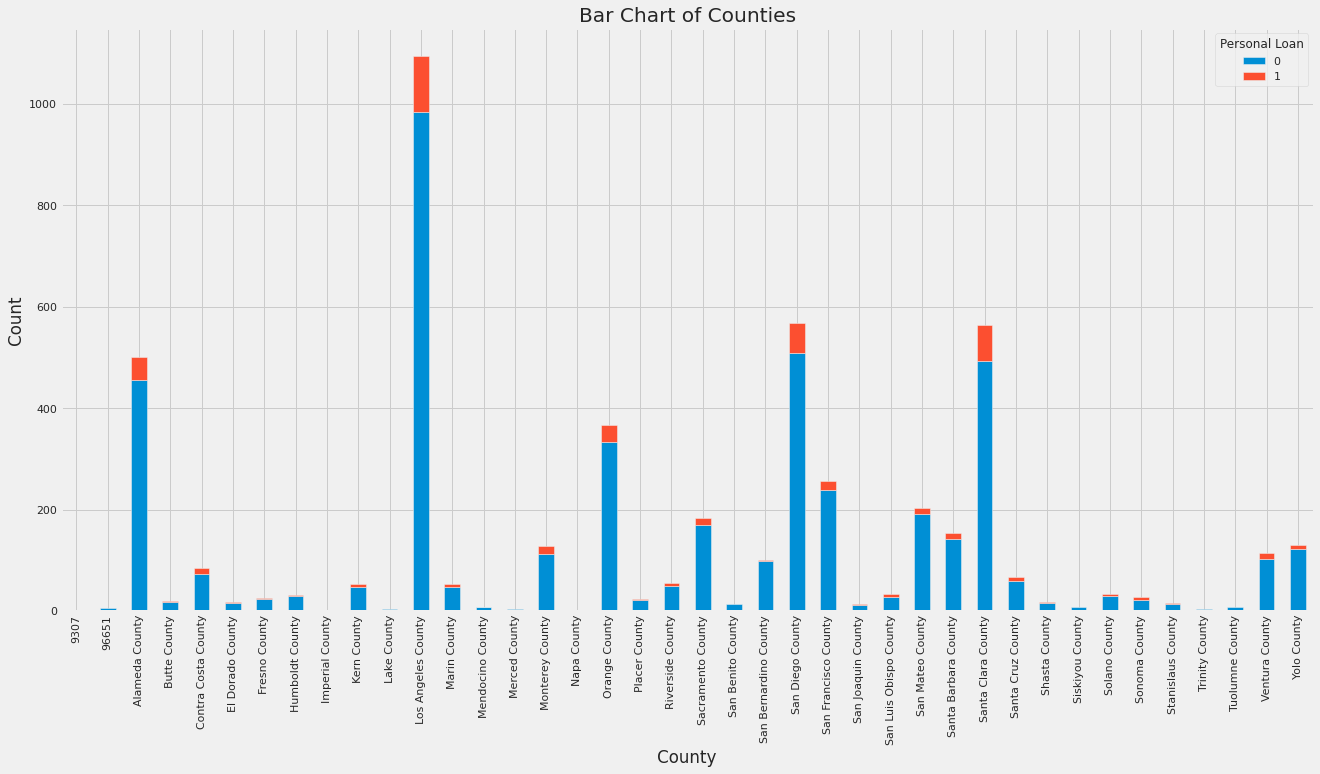

In [50]:
plt.figure(figsize=(20,10))
matplotlib.style.use('fivethirtyeight')
ax=pd.crosstab(index=BankData['County'],columns=BankData['Personal Loan'].sort_values(ascending=False)).plot(kind='bar',stacked=True,figsize=(20,10))
plt.title("Bar Chart of Counties")
plt.xlabel("County")
plt.ylabel("Count")
plt.show()

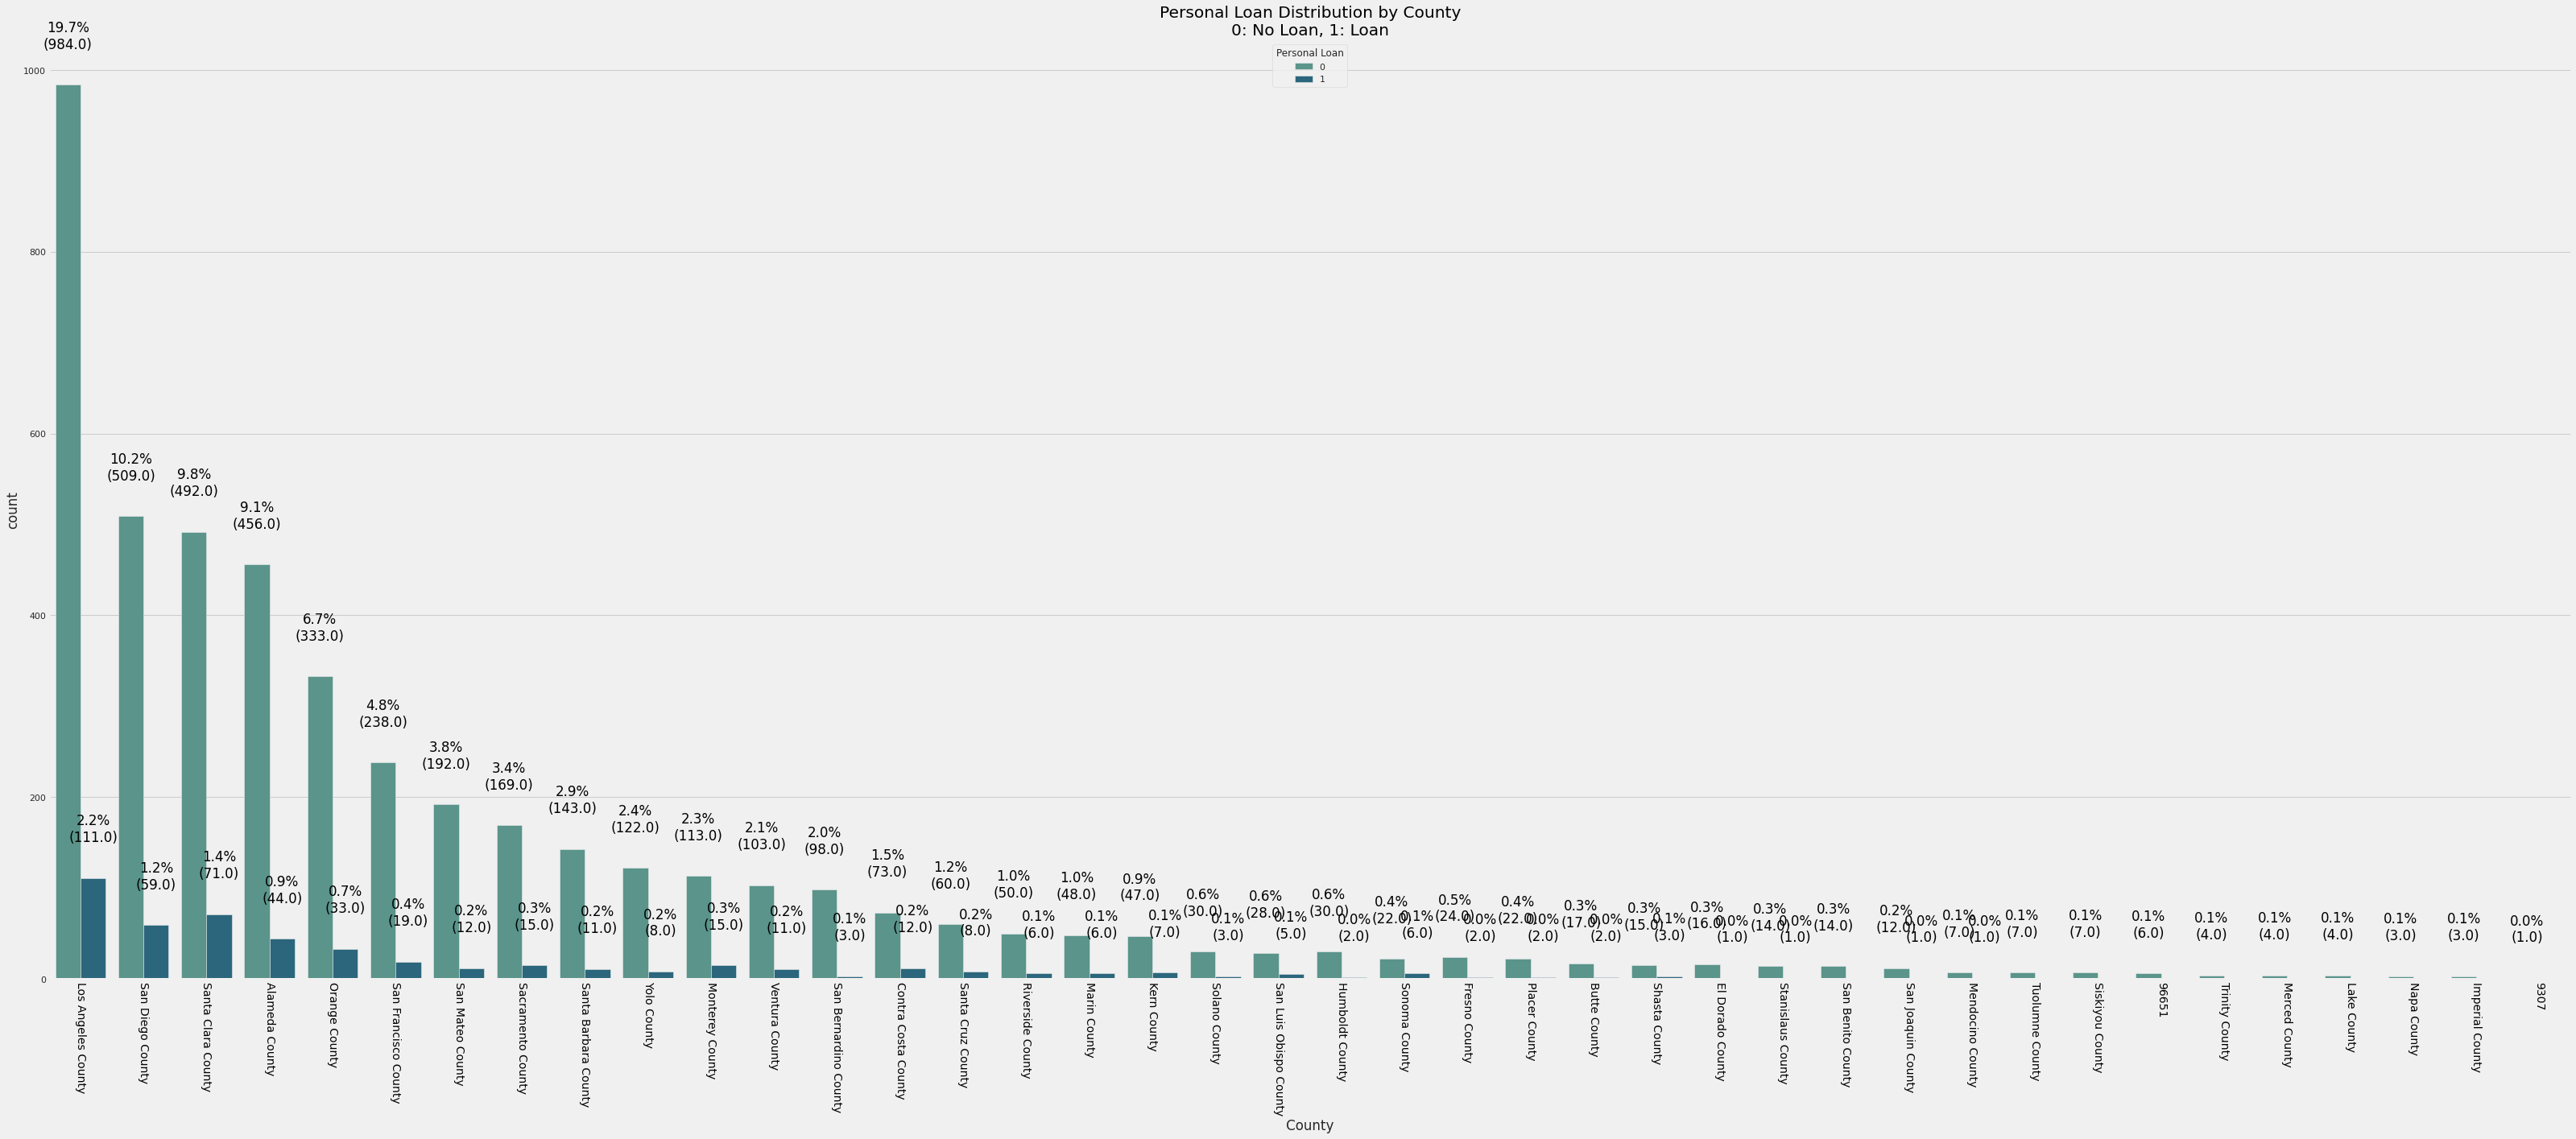

In [51]:
plt.figure(figsize=(50,20));
order = BankData['County'].value_counts(ascending=False).index  
ax=sns.countplot(data=BankData, x='County', hue='Personal Loan', palette = 'crest', order=order)

for p in ax.patches:
    percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(BankData['Personal Loan']), p.get_height())
    # Added percentage and actual value
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 40
    plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='large'); 
    plt.xticks(color='black', fontsize='medium', rotation= -90);

plt.title('Personal Loan Distribution by County\n0: No Loan, 1: Loan', color='black');

Text(0.5, 1.0, 'Correlation Heatmap')

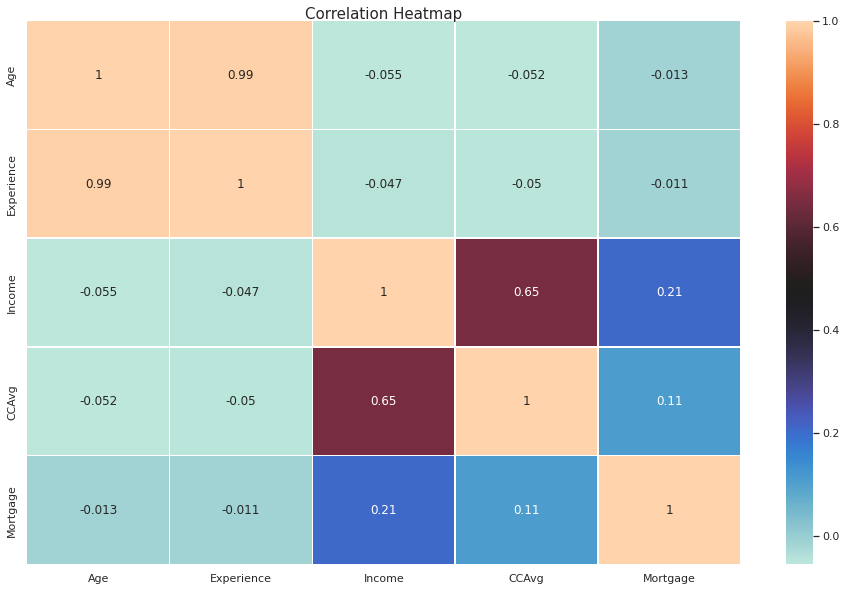

In [47]:
#Corrolation Cheking
plt.figure(figsize=(16,10))
Numeric = ['Age', 'Experience', 'Income','CCAvg','Mortgage']
HeatMap=sns.heatmap(BankData[Numeric].corr(),annot=True,cmap=sns.color_palette("icefire", as_cmap=True),linewidths=0.5)
HeatMap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=2)

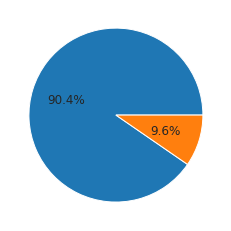

In [48]:
#Balance Cheking
#Imbalanced Data Set>>0:9.6%,1:90.4%
plt.pie(data=BankData,x=BankData["Personal Loan"].value_counts(),autopct='%1.1f%%')
plt.show()

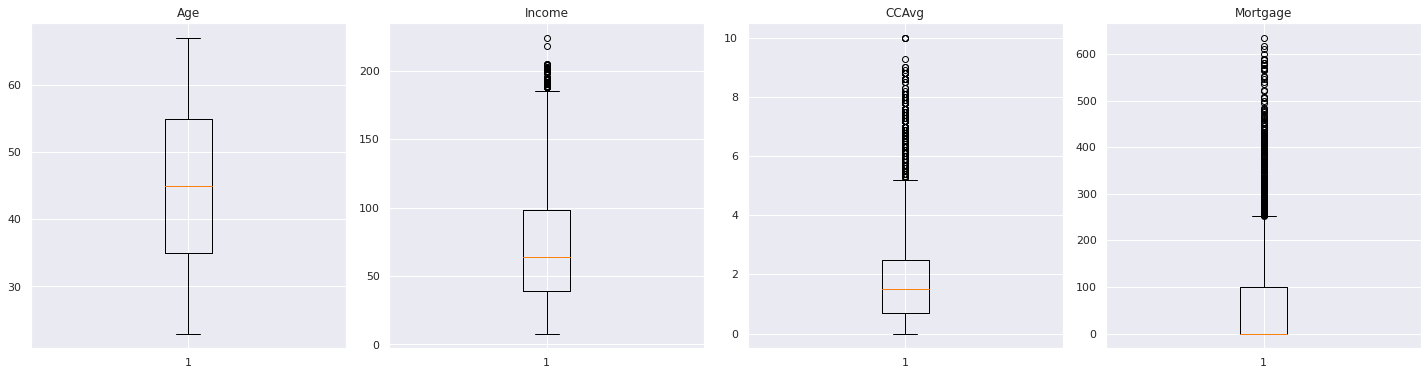

In [49]:
#Outlier checking using box plot
plt.figure(figsize=(20,20))
Numeric = ['Age', 'Income','CCAvg','Mortgage']
for i, variable in enumerate(Numeric):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(BankData[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [50]:
percentile25 = BankData['CCAvg'].quantile(0.25)
percentile75 = BankData['CCAvg'].quantile(0.75)
IQR =percentile75-percentile25
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
BankData[BankData['CCAvg'] > upper_limit]
#BankData[BankData['CCAvg'] < lower_limit]

Age  Experience  ...  Spending_group                  County
9      34           9  ...            High          Ventura County
18     46          21  ...            High      Los Angeles County
44     46          20  ...            High        San Mateo County
55     41          17  ...            High      Santa Clara County
61     47          21  ...            High  San Luis Obispo County
...   ...         ...  ...             ...                     ...
4908   40          16  ...            High        San Diego County
4911   46          22  ...            High          Alameda County
4937   33           8  ...            High            Marin County
4980   29           5  ...            High        El Dorado County
4993   45          21  ...            High      Los Angeles County

[324 rows x 17 columns]

In [52]:
#Handeling outlier
BankData1= BankData.copy()
BankData1['CCAvg'] = np.where(
    BankData1['CCAvg'] > upper_limit,
    upper_limit,
    np.where(
        BankData1['CCAvg'] < lower_limit,
        lower_limit,
        BankData1['CCAvg']
    )
)

In [53]:
percentile25 = BankData1['Income'].quantile(0.25)
percentile75 = BankData1['Income'].quantile(0.75)
IQR =percentile75-percentile25
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
BankData[BankData1['Income'] > upper_limit]
#BankData[BankData1['Income'] < lower_limit]

Age  Experience  Income  ...  Income_group Spending_group              County
18     46          21     193  ...          High           High  Los Angeles County
47     37          12     194  ...          High            Low  Los Angeles County
53     50          26     190  ...          High         Medium  Los Angeles County
59     31           5     188  ...          High           High      Ventura County
303    49          25     195  ...          High           High         Yolo County
...   ...         ...     ...  ...           ...            ...                 ...
4659   28           4     199  ...          High           High    San Diego County
4670   52          26     194  ...          High         Medium  Santa Clara County
4895   45          20     201  ...          High           High    San Diego County
4981   34           9     195  ...          High           High  Los Angeles County
4993   45          21     218  ...          High           High  Los Angeles County

[96 rows x 17 columns]

In [54]:
BankData2= BankData1.copy()
BankData2['Income'] = np.where(
    BankData2['Income'] > upper_limit,
    upper_limit,
    np.where(
        BankData2['Income'] < lower_limit,
        lower_limit,
        BankData2['Income']
    )
)

In [55]:
percentile25 = BankData2['Mortgage'].quantile(0.25)
percentile75 = BankData2['Mortgage'].quantile(0.75)
IQR =percentile75-percentile25
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
BankData[BankData2['Mortgage'] > upper_limit]
#BankData[BankData2['Income'] < lower_limit]

Age  Experience  Income  ...  Income_group Spending_group                County
22     29           5      62  ...        Middle         Medium    Los Angeles County
39     38          13      80  ...        Middle            Low  San Francisco County
42     32           7     132  ...        Middle         Medium    Los Angeles County
59     31           5     188  ...          High           High        Ventura County
66     62          36     105  ...        Middle           High     Sacramento County
...   ...         ...     ...  ...           ...            ...                   ...
4859   34           8     165  ...          High           High    Los Angeles County
4865   50          24     133  ...        Middle         Medium    Los Angeles County
4899   54          29      85  ...        Middle         Medium         Sonoma County
4942   52          26     109  ...        Middle         Medium        Alameda County
4963   32           6      98  ...        Middle           High    Santa Clara County

[291 rows x 17 columns]

In [56]:
BankDataF= BankData2.copy()
BankDataF['Mortgage'] = np.where(
    BankDataF['Mortgage'] > upper_limit,
    upper_limit,
    np.where(
        BankDataF['Mortgage'] < lower_limit,
        lower_limit,
        BankDataF['Mortgage']
    )
)

In [57]:
BankDataF['ZIP Code'] = BankDataF['ZIP Code'].astype('category')

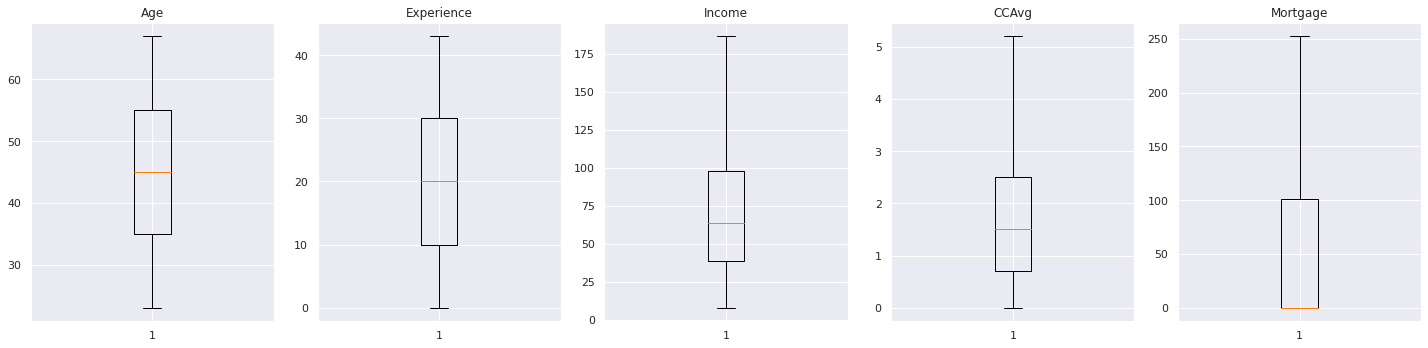

In [58]:
numerical_col = BankDataF.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1,5,i+1)
    plt.boxplot(BankDataF[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [60]:
#drop column which we don't need for modelling
BankDataF.drop(columns=["Agebin", "ZIP Code","County",'Experience','Income_group','Spending_group'], inplace=True)

In [61]:
BankDataF

Age  Income Family  CCAvg  ... Securities Account  CD Account Online CreditCard
0      25    49.0      4    1.6  ...                  1           0      0          0
1      45    34.0      3    1.5  ...                  1           0      0          0
2      39    11.0      1    1.0  ...                  0           0      0          0
3      35   100.0      1    2.7  ...                  0           0      0          0
4      35    45.0      4    1.0  ...                  0           0      0          1
...   ...     ...    ...    ...  ...                ...         ...    ...        ...
4995   29    40.0      1    1.9  ...                  0           0      1          0
4996   30    15.0      4    0.4  ...                  0           0      1          0
4997   63    24.0      2    0.3  ...                  0           0      0          0
4998   65    49.0      3    0.5  ...                  0           0      1          0
4999   28    83.0      3    0.8  ...                  0           0      1          1

[5000 rows x 11 columns]

In [63]:
BankDataF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   float64 
 2   Family              5000 non-null   category
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   object  
 5   Mortgage            5000 non-null   float64 
 6   Personal Loan       5000 non-null   category
 7   Securities Account  5000 non-null   category
 8   CD Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
dtypes: category(6), float64(3), int64(1), object(1)
memory usage: 424.3+ KB


In [72]:
BankDataF['Education'] = BankDataF['Education'].astype('object')

In [70]:
#Convert Education to 1,2,3 level
BankDataF["Education"].replace({'Undergrad':'1','Graudate':'2','Professioanl':'3'},inplace=True)
BankDataF.sample(5)

Age  Income Family  CCAvg  ... Securities Account  CD Account Online CreditCard
4302   52    85.0      3    3.4  ...                  0           0      0          0
259    56    55.0      1    1.4  ...                  0           0      1          0
4439   33   104.0      2    3.6  ...                  0           0      0          1
3670   38    29.0      4    0.4  ...                  0           0      1          0
4879   40    43.0      4    1.7  ...                  0           0      0          0

[5 rows x 11 columns]

In [74]:
#Separating the predictors and Targets
X = BankDataF.drop(labels=['Personal Loan'],axis=1)
y = BankDataF['Personal Loan']
X = pd.get_dummies(data=X, columns=['Education'], drop_first=True)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [76]:
print('Shape of Training set : ',X_train.shape )
print('Shape of test set : ',X_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True)*100)
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True)*100)

Shape of Training set :  (3500, 11)
Shape of test set :  (1500, 11)
Percentage of classes in training set:
 0    90.542857
1     9.457143
Name: Personal Loan, dtype: float64
Percentage of classes in test set:
 0    90.066667
1     9.933333
Name: Personal Loan, dtype: float64


### Molde Building

In [89]:
def make_confusion_matrix(model,test_X,y_actual,i,seg,labels=[1, 0]):

    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ['Actual - Borrowed', 'Actual - Not Borrowed']],
                  columns = [i for i in ['Predicted - Borrowed','Predicted - Not Borrowed']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='', ax=axes[i], cmap='Blues').set(title='Confusion Matrix of {} Set'.format(seg))

In [84]:
#Build Tree
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [85]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9866666666666667


In [86]:
#get recall only 
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [87]:
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.912751677852349


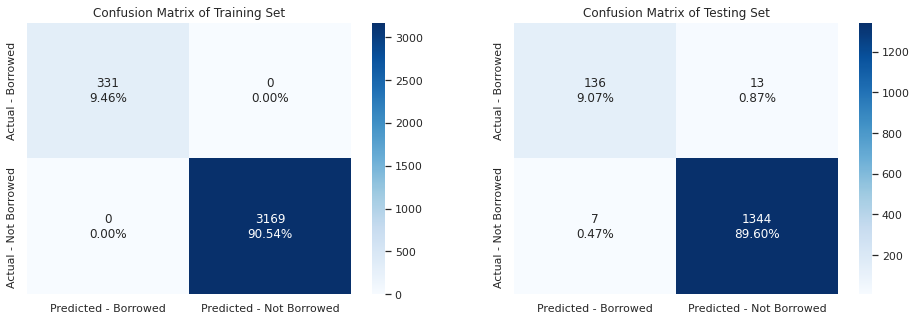

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [91]:
fig, axes = plt.subplots(1,2,figsize=(16,5));

make_confusion_matrix(dTree, X_train, y_train, i=0, seg='Training')
make_confusion_matrix(dTree, X_test, y_test, i=1, seg='Testing')

In [92]:
#Visualize the Decision Tree
feature_names = list(X.columns)
feature_names

['Age',
 'Income',
 'Family',
 'CCAvg',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Education_2',
 'Education_3']

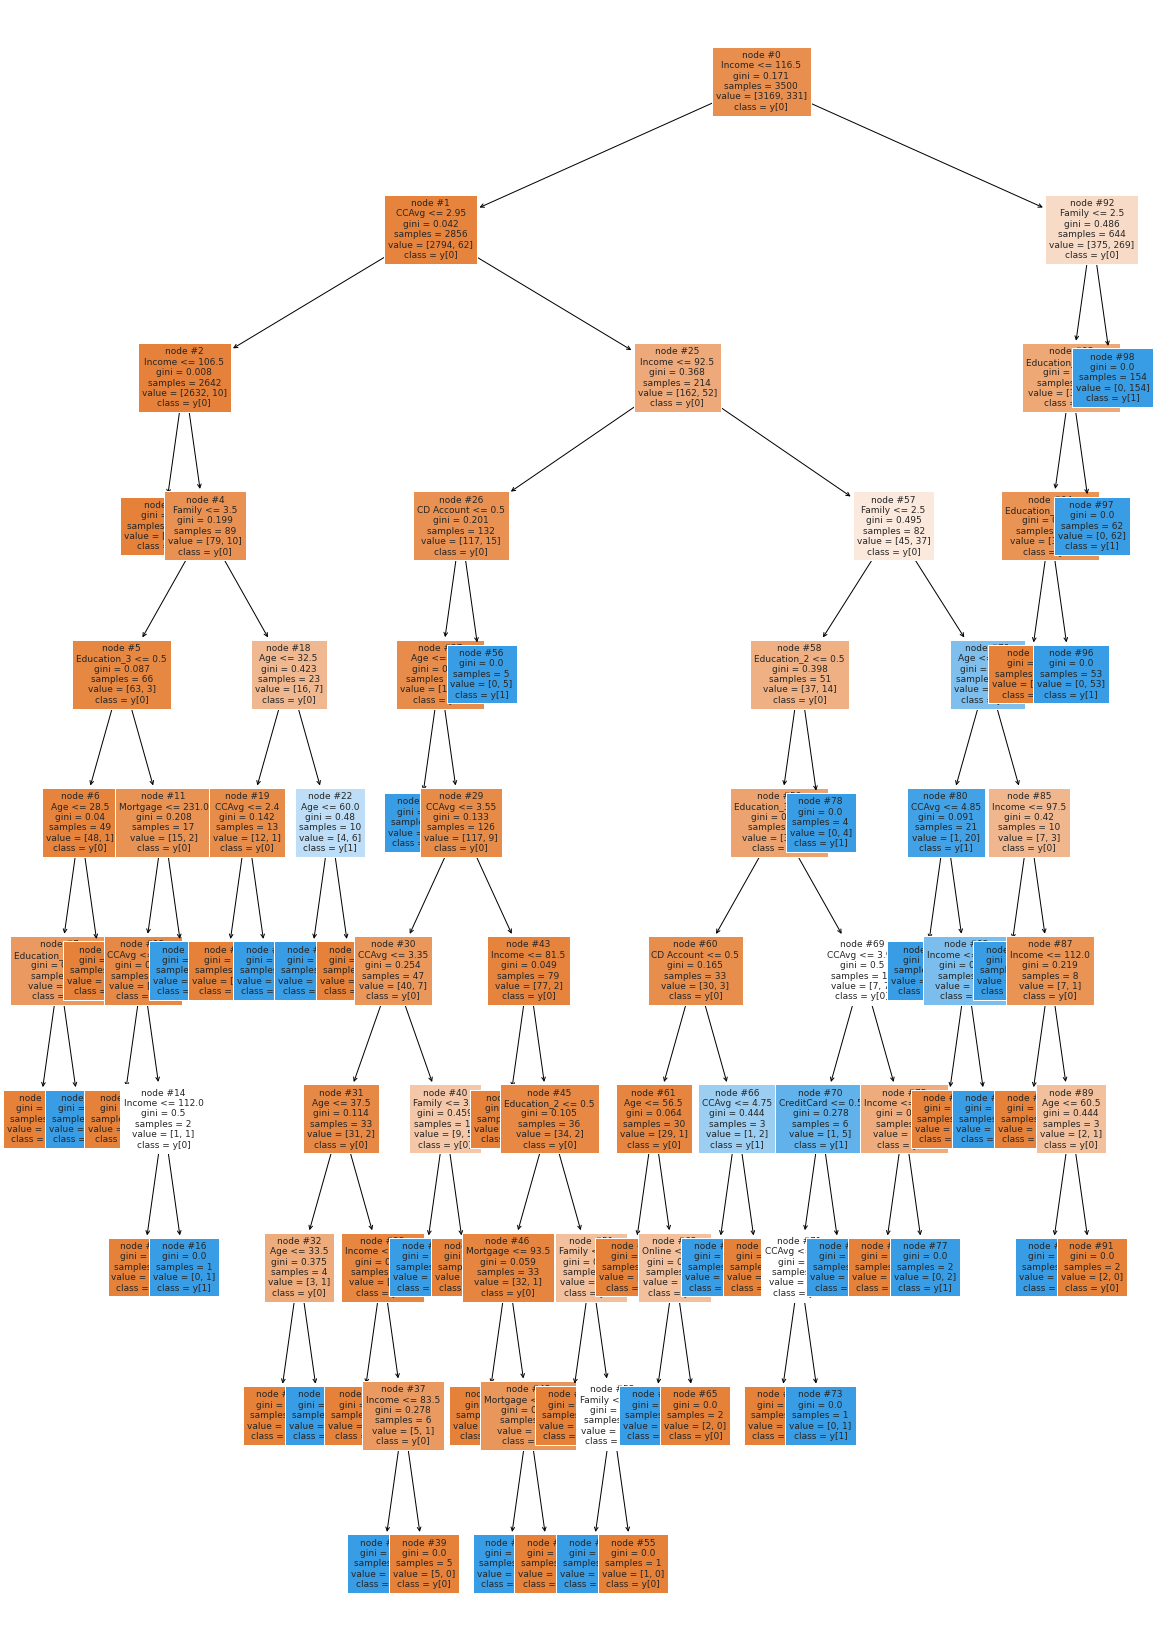

In [93]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [94]:
#showing the rules of a decision tree
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Income <= 112.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  112.00
|   

In [95]:
#Feature Importance
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], \
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.315198
Family              0.259811
Education_2         0.166192
Education_3         0.144605
CCAvg               0.055184
Age                 0.032404
CD Account          0.017273
Mortgage            0.005996
Online              0.002224
CreditCard          0.001112
Securities Account  0.000000


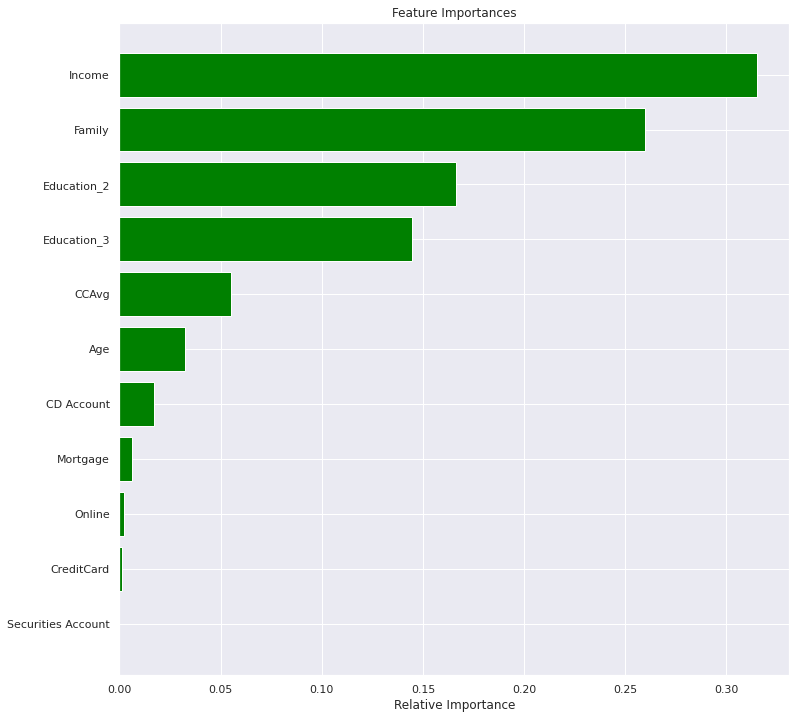

In [96]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [113]:
#Pre pruning
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=1, class_weight={0:0.91, 1:0.09})
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.91, 1: 0.09}, max_depth=5,
                       random_state=1)

In [114]:
#Checking scores
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9837142857142858
Accuracy on test set :  0.972
Recall on training set :  0.8277945619335347
Recall on test set :  0.7315436241610739


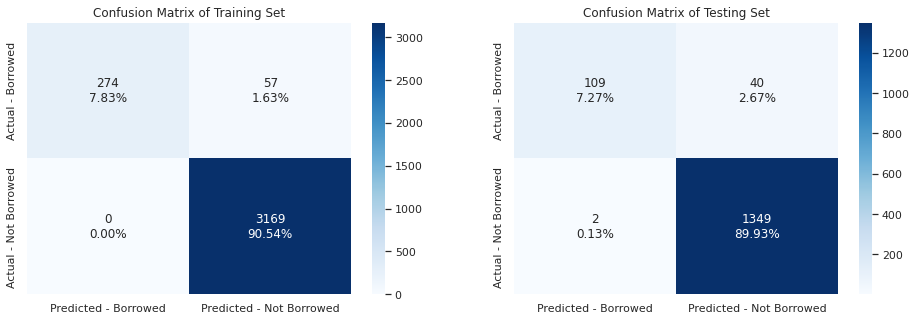

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [115]:
fig, axes = plt.subplots(1,2,figsize=(16,5));

make_confusion_matrix(dTree1, X_train, y_train, i=0, seg='Training')
make_confusion_matrix(dTree1, X_test, y_test, i=1, seg='Testing')

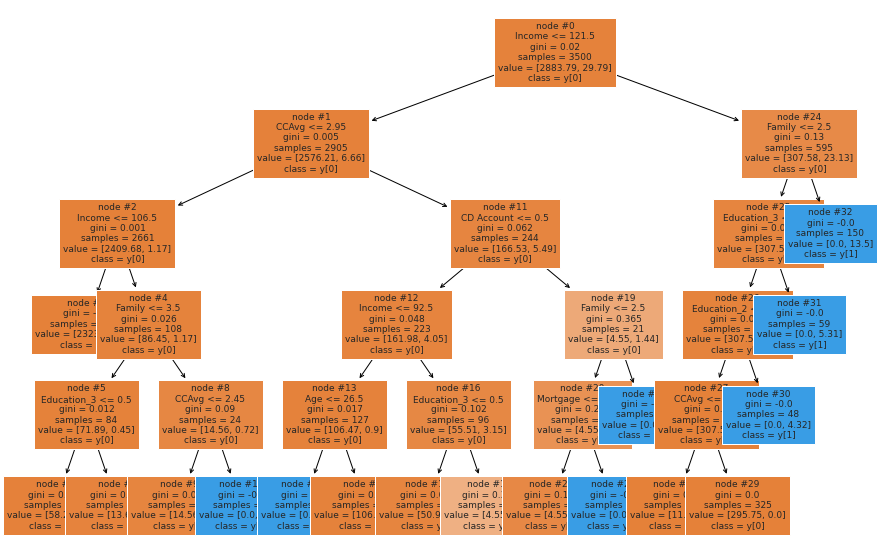

In [116]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [121]:
print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Income <= 121.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2323.23, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- weights: [58.24, 0.18] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- weights: [13.65, 0.27] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- CCAvg <= 2.45
|   |   |   |   |   |--- weights: [14.56, 0.45] class: 0
|   |   |   |   |--- CCAvg >  2.45
|   |   |   |   |   |--- weights: [0.00, 0.27] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 0.09] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- weights: [106.47, 0.81] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- weights: [50.96, 1.44] class: 0


In [117]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], \
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Family              0.511439
Education_3         0.217568
Education_2         0.171073
Income              0.057153
CCAvg               0.016391
Mortgage            0.011987
CD Account          0.010832
Age                 0.003557
Securities Account  0.000000
Online              0.000000
CreditCard          0.000000


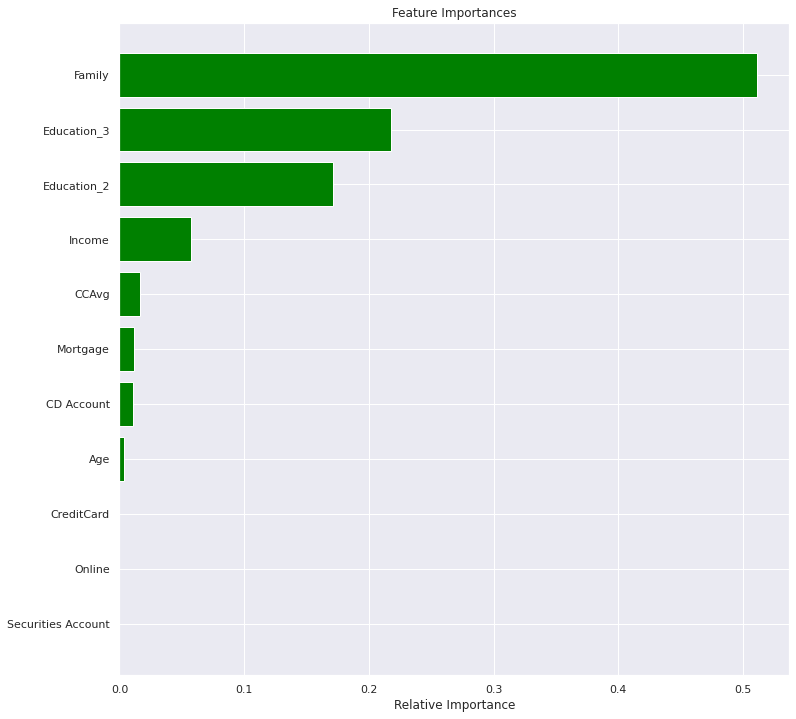

In [118]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [78]:
#Other Models
conf_matrix_all = {}

def personal_loan_prediction(name, algo, training_x, testing_x, training_y, testing_y, plot) :
    algo.fit(training_x,training_y)                           # Fit the training data set to the algorithm passed.
    predictions = algo.predict(testing_x)                     # Get all predictions
    probabilities = algo.predict_proba(testing_x)             # Get probablities of predictions

    conf_matrix = confusion_matrix(testing_y, predictions)    # Get confusion matrix using the predictions
    tn, fp, fn, tp = conf_matrix.ravel()
    
    conf_matrix_all[name] = conf_matrix                       # Save confusion matrix values to a dictionary
    
    print("Classification report:")                           # Print the classification report
    print(classification_report(testing_y, predictions))
  
    model_roc_auc = roc_auc_score(testing_y, predictions)           # Get the Area under the curve number
    fpr,tpr,thresholds = roc_curve(testing_y, probabilities[:,1])   # Get False postive rate and true positive rate
    
    print ("Area under the curve: ", model_roc_auc)
    
    
    if plot:
        fig, axes = plt.subplots(1,2, figsize=(20, 7))
        conf_matrix = np.flip(conf_matrix)
        
        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_matrix.astype(str), labels)
        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);                                           # Plot the confusion matrix
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        plt.title('Receiver Operating Characteristic')
        sns.lineplot(fpr, tpr, ax=axes[1])                                         # Plot the ROC curve
        plt.plot([0, 1], [0, 1],'--')                                              # Plot the diagonal line
        axes[1].set_xlim([0, 1])                                                   # Set x-axis limit to 0 and 1
        axes[1].set_ylim([0, 1])                                                   # Set y-axis limit to 0 and 1
        axes[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate');
        plt.show();

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.71      0.40      0.52       149

    accuracy                           0.92      1500
   macro avg       0.83      0.69      0.74      1500
weighted avg       0.92      0.92      0.92      1500

Area under the curve:  0.6924599724787505


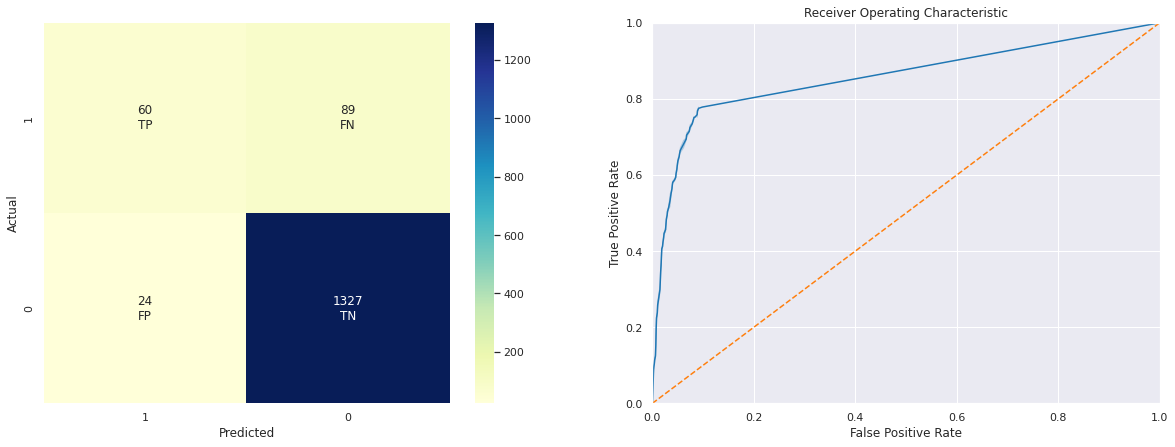

In [120]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan', metric_params=None, n_neighbors = 3, weights='distance')

personal_loan_prediction("K-Nearest Neighbours", KNN, X_train, X_test, y_train, y_test, plot=True)

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.98      0.73      0.84       149

    accuracy                           0.97      1500
   macro avg       0.98      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500

Area under the curve:  0.8650316196304998


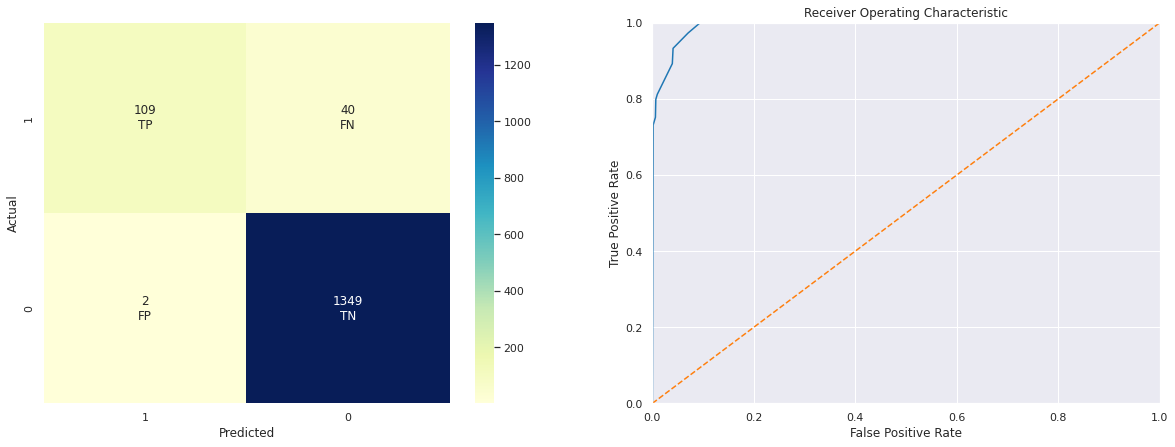

In [119]:
#dTree1,DecisionTreeClassifier
personal_loan_prediction("DecisionTreeClassifier", dTree1, X_train, X_test, y_train, y_test, plot=True)